# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology
from skimage import data, color, exposure


# 1. Channels and color spaces

### **1.1 Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

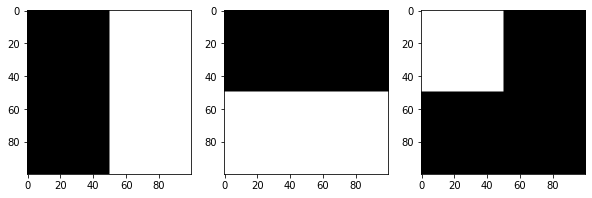

### 1.2   Visualize the created images in a 1 x 3 subplot using matplotlib.


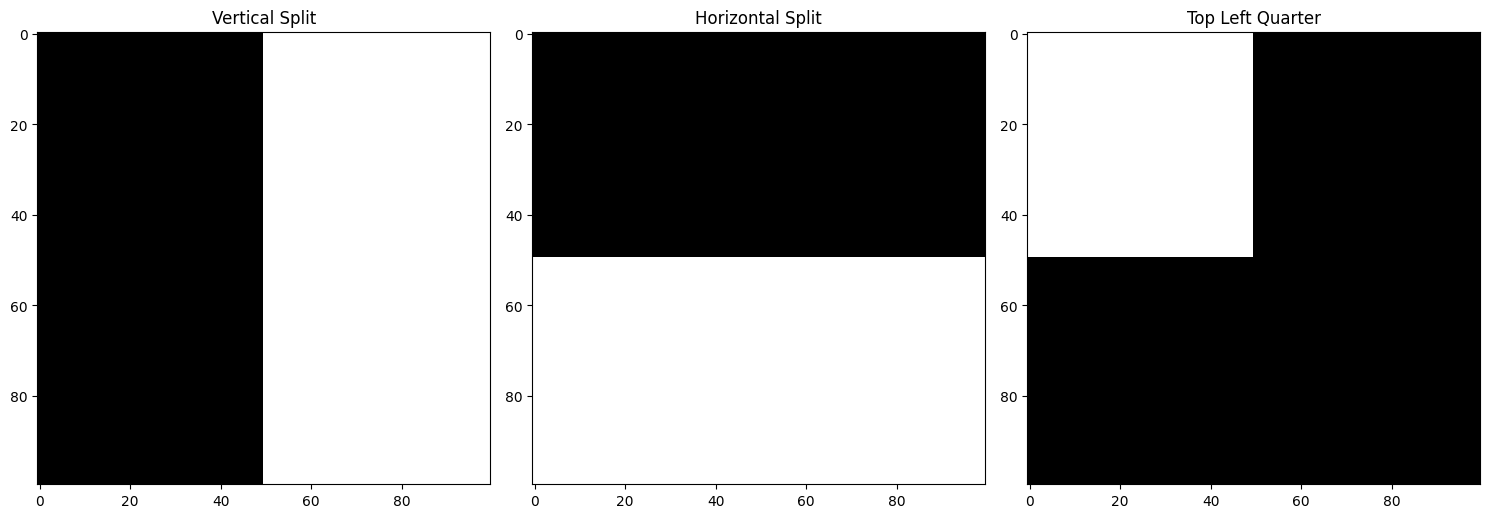

In [2]:
# solution
# Exercise 1: Create three binary images
size = (100, 100)

# 1st: Vertical left half black, right half white
image1 = np.zeros(size, dtype=np.uint8)
image1[:, 50:] = 255

# 2nd: Horizontal top black, bottom white
image2 = np.zeros(size, dtype=np.uint8)  
image2[50:, :] = 255

# 3rd: All black except top left quarter white
image3 = np.zeros(size, dtype=np.uint8)
image3[:50, :50] = 255

# Display individual images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ['Vertical Split', 'Horizontal Split', 'Top Left Quarter']
images = [image1, image2, image3]

for i, (ax, img, title) in enumerate(zip(axes, images, titles)):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('on')

plt.tight_layout()
plt.show()

In [3]:
# Slicing syntax: array[start:stop:step]

# For vertical split: image1[:, 50:] = 255
# This means: "All rows, columns from 50 to end = white"

# For horizontal split: image2[50:, :] = 255  
# This means: "Rows from 50 to end, all columns = white"

# For top left quarter: image3[:50, :50] = 255
# This means: "Rows 0-49, columns 0-49 = white"

### 1.3 *   Use the above three images to create the following image

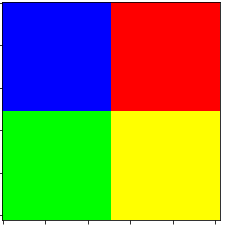
*Hint: Remember channels and color spaces*

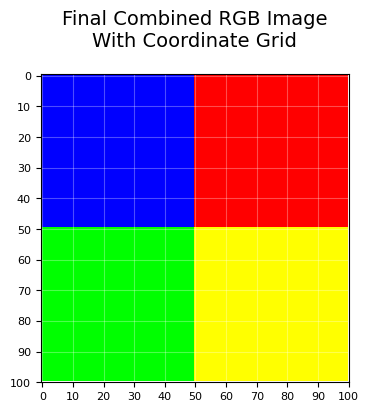

In [4]:
# solution

# Combine the three channel images to create the final RGB image
# Using the hint about channels and color spaces

# Create final RGB image by assigning each pattern to a color channel
final_image = np.zeros((100, 100, 3), dtype=np.uint8)

# Red channel gets vertical pattern
final_image[:, :, 0] = image1  # Red = vertical split

# Green channel gets horizontal pattern  
final_image[:, :, 1] = image2  # Green = horizontal split

# Blue channel gets top left quarter pattern
final_image[:, :, 2] = image3  # Blue = top left quarter

# Display final image with coordinate grid
plt.figure(figsize=(4, 4))
plt.imshow(final_image)
plt.title('Final Combined RGB Image\nWith Coordinate Grid', fontsize=14, pad=20)

# Add coordinate grid
plt.xticks(range(0, 101, 10))
plt.yticks(range(0, 101, 10))
plt.grid(True, alpha=0.3, color='white')
plt.tick_params(axis='both', which='major', labelsize=8)

# Add center lines
# plt.axvline(x=50, color='yellow', linestyle='--', alpha=0.7, linewidth=2)
# plt.axhline(y=50, color='yellow', linestyle='--', alpha=0.7, linewidth=2)

plt.show()


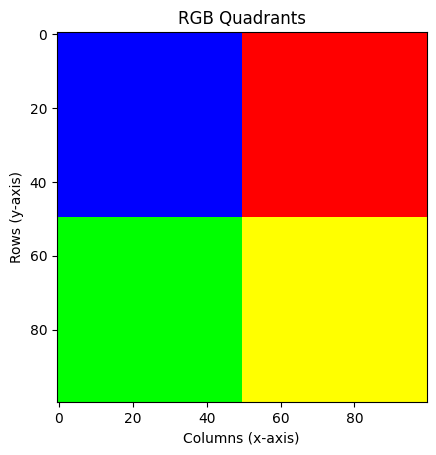

In [5]:
# Separate colors

# Create empty RGB image (100x100 pixels, 3 channels)
img_rgb = np.zeros((100, 100, 3), dtype=np.uint8)

# Split into 4 quadrants of size 50x50
# Top-left: Blue
img_rgb[0:50, 0:50] = [0, 0, 255]

# Top-right: Red
img_rgb[0:50, 50:100] = [255, 0, 0]

# Bottom-left: Green
img_rgb[50:100, 0:50] = [0, 255, 0]

# Bottom-right: Yellow (Red + Green)
img_rgb[50:100, 50:100] = [255, 255, 0]

# Plot with axes
plt.imshow(img_rgb)
plt.title("RGB Quadrants")
plt.xlabel("Columns (x-axis)")
plt.ylabel("Rows (y-axis)")
plt.show()

# 2 **Exercise: Color Manipulation**

### 2.1 *   Read the image 'sillas.jpg' from the images folder

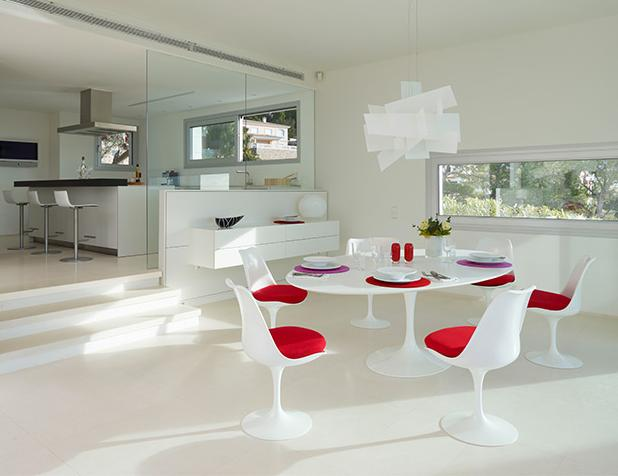

### 2.2 *   Extract individual channels and plot them using matplotlib subplot.



In [6]:
# # solution

# from PIL import Image
# from numpy import asarray
# from matplotlib import image
# from matplotlib import pyplot
# import numpy as np

# # load the image
# image = Image.open('images/sillas.jpg')

# # convert image to numpy array
# data = asarray(image)
# print(type(data))

# # summarize shape
# print(data.shape)

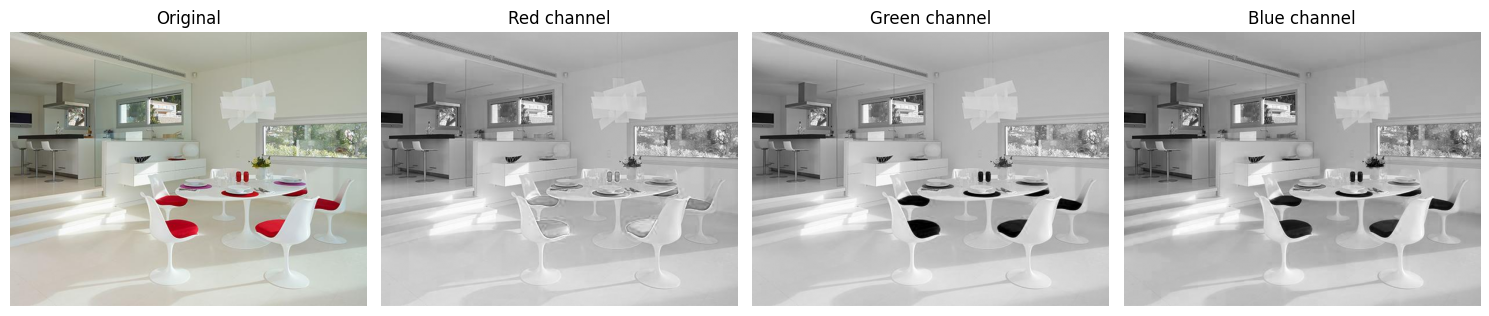

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Read image with matplotlib (loads as RGB automatically)
img = plt.imread("images/sillas.jpg")

# 2. Extract channels
red_channel   = img[:, :, 0]
green_channel = img[:, :, 1]
blue_channel  = img[:, :, 2]

# 3. Plot original + channels
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(img)
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(red_channel, cmap="gray")
axes[1].set_title("Red channel")
axes[1].axis("off")

axes[2].imshow(green_channel, cmap="gray")
axes[2].set_title("Green channel")
axes[2].axis("off")

axes[3].imshow(blue_channel, cmap="gray")
axes[3].set_title("Blue channel")
axes[3].axis("off")

plt.tight_layout()
plt.show()


*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

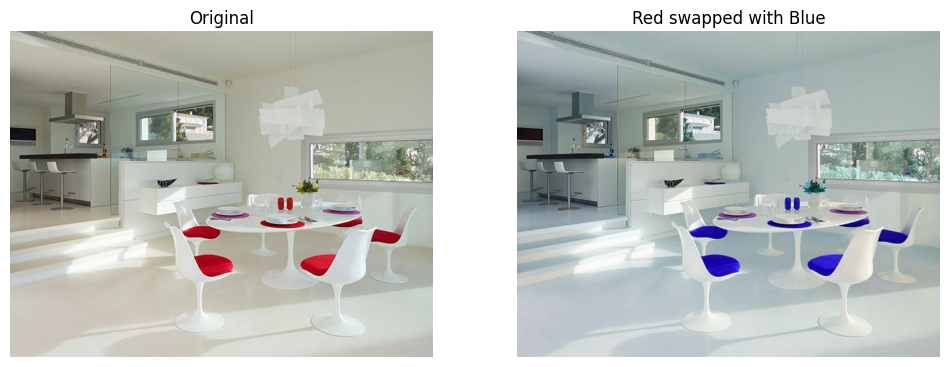

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Read original image
img = plt.imread("images/sillas.jpg")

# 2. Make a copy to avoid overwriting original
img_new = img.copy()

# 3. Swap Red and Blue channels
img_new[:, :, 0] = img[:, :, 2]  # Red <- Blue
img_new[:, :, 2] = img[:, :, 0]  # Blue <- Red

# 4. Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(img)
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(img_new)
axes[1].set_title("Red swapped with Blue")
axes[1].axis("off")

plt.show()


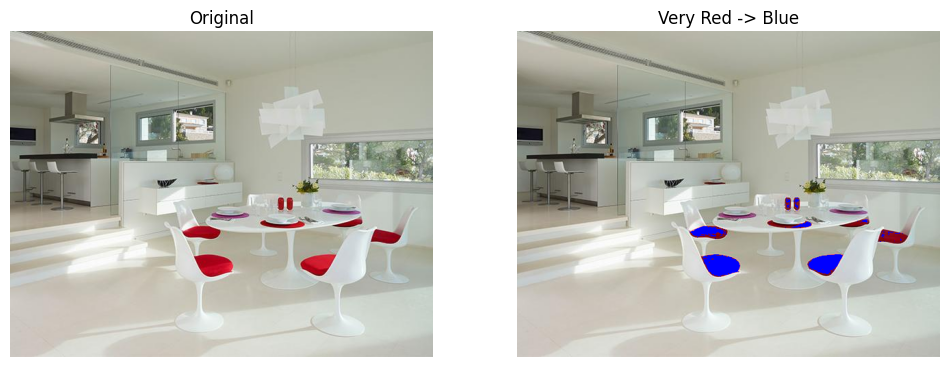

In [9]:

# 1. Read the image
img_new2 = img.copy()

# 2. Define a "very red" mask
# Thresholds (0-255 for uint8, 0-1 if float)
red_threshold = 150   # Red must be higher than this
green_threshold = 100 # Green must be lower than this
blue_threshold = 100  # Blue must be lower than this

# Create the mask
# For float images (0-1), divide thresholds by 255
if img.dtype == np.float32 or img.dtype == np.float64:
    red_mask = (img[:, :, 0] > red_threshold/255) & \
               (img[:, :, 1] < green_threshold/255) & \
               (img[:, :, 2] < blue_threshold/255)
else:  # uint8 image
    red_mask = (img[:, :, 0] > red_threshold) & \
               (img[:, :, 1] < green_threshold) & \
               (img[:, :, 2] < blue_threshold)

# 3. Change only very red pixels to blue
# Set Red=0, Green=0, Blue=255 for masked pixels
img_new2[red_mask] = [0, 0, 255]

# 4. Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img)
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(img_new2)
axes[1].set_title("Very Red -> Blue")
axes[1].axis("off")

plt.show()


# 3. Image Manipulation

### **3.1 Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

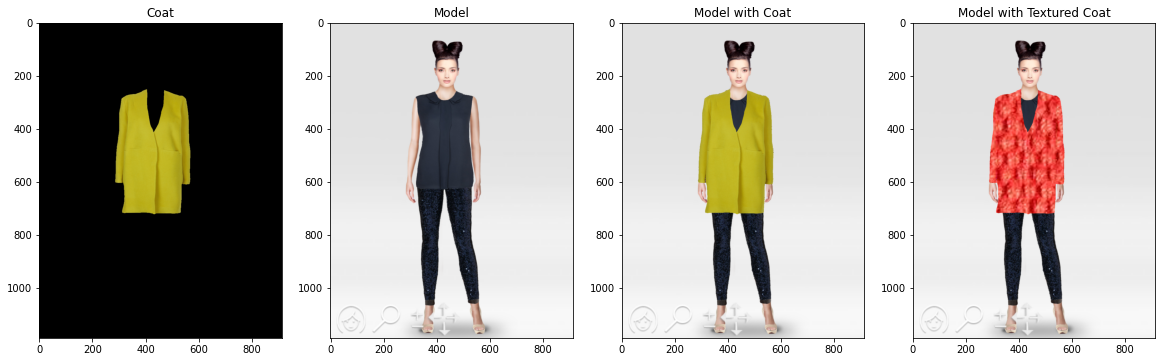

### Image "EDA"


--- EDA for images/coat.png ---
Shape: (1188, 915, 4)
Data type: uint8
R channel: min=0, max=205
G channel: min=0, max=195
B channel: min=0, max=145
A channel: min=255, max=255


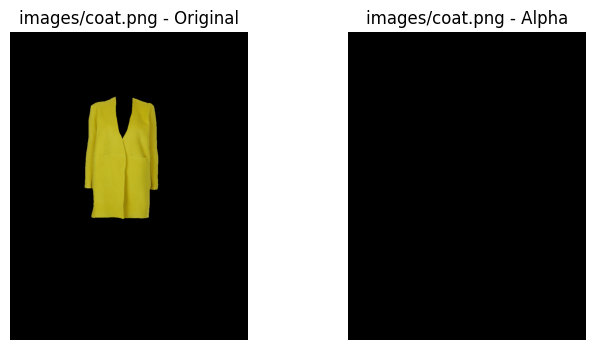


--- EDA for images/model.png ---
Shape: (1188, 915, 4)
Data type: uint8
R channel: min=0, max=255
G channel: min=0, max=255
B channel: min=0, max=255
A channel: min=255, max=255


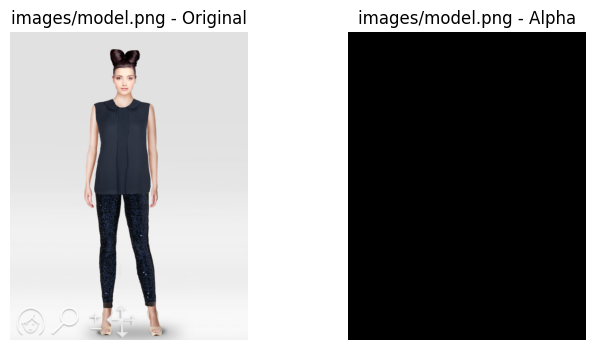


--- EDA for images/texture.png ---
Shape: (183, 275, 3)
Data type: uint8
R channel: min=21, max=255
G channel: min=0, max=233
B channel: min=0, max=185


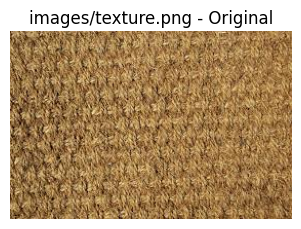


--- EDA for images/texture2.png ---
Shape: (1188, 915, 3)
Data type: uint8
R channel: min=117, max=255
G channel: min=0, max=204
B channel: min=0, max=185


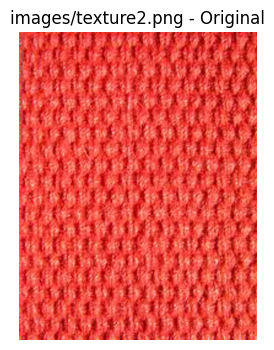


--- EDA for images/texture3.jpg ---
Shape: (350, 350, 3)
Data type: uint8
R channel: min=57, max=255
G channel: min=33, max=254
B channel: min=3, max=228


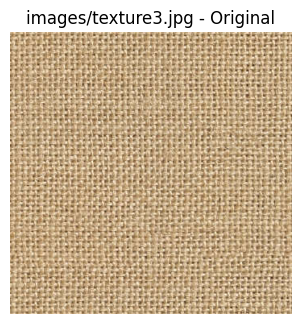

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

images = [
    "images/coat.png",
    "images/model.png",
    "images/texture.png",
    "images/texture2.png",
    "images/texture3.jpg"
]

for path in images:
    img = np.array(Image.open(path))
    print(f"\n--- EDA for {path} ---")
    print("Shape:", img.shape)
    print("Data type:", img.dtype)
    
    channels = ["R","G","B"]
    if img.shape[2] == 4:
        channels.append("A")
    
    for i, ch in enumerate(channels):
        print(f"{ch} channel: min={img[:,:,i].min()}, max={img[:,:,i].max()}")
    
    # Plot original and alpha if exists
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title(f"{path} - Original")
    plt.axis("off")
    
    if img.shape[2] == 4:
        plt.subplot(1,2,2)
        plt.imshow(img[:,:,3], cmap="gray")
        plt.title(f"{path} - Alpha")
        plt.axis("off")
    
    plt.show()


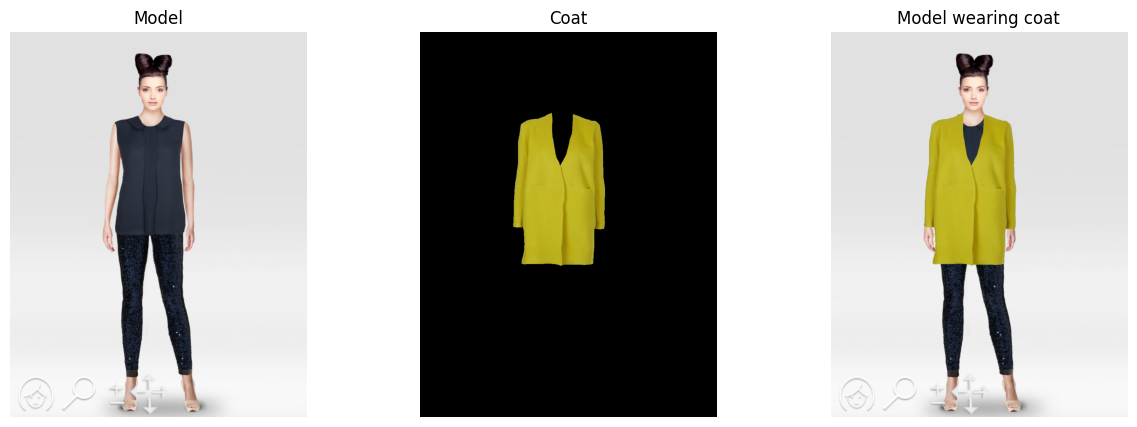

In [11]:
# 1. Load images and convert to RGB (ignore alpha)
model = np.array(Image.open("images/model.png").convert("RGB"))
coat = np.array(Image.open("images/coat.png").convert("RGB"))
texture1 = np.array(Image.open("images/texture.png").convert("RGB"))
texture1 = np.array(Image.open("images/texture2.png").convert("RGB"))


# 2. Create a mask where coat exists (non-black pixels)
coat_mask = np.any(coat != [0, 0, 0], axis=2)  # True where coat is colored

# 3. Create composite image
composite = model.copy()
composite[coat_mask] = coat[coat_mask]  # overlay coat only on masked pixels

# 4. Visualize
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(model)
axes[0].set_title("Model")
axes[0].axis("off")

axes[1].imshow(coat)
axes[1].set_title("Coat")
axes[1].axis("off")

axes[2].imshow(composite)
axes[2].set_title("Model wearing coat")
axes[2].axis("off")

plt.show()

In [12]:
# 4. Prepare texture for overlay
# Resize or tile texture to match coat size
if texture1.shape[0] != coat.shape[0] or texture1.shape[1] != coat.shape[1]:
    reps_x = int(np.ceil(coat.shape[0] / texture1.shape[0]))
    reps_y = int(np.ceil(coat.shape[1] / texture1.shape[1]))
    texture_tiled = np.tile(texture1, (reps_x, reps_y, 1))
    texture_tiled = texture_tiled[:coat.shape[0], :coat.shape[1], :]
else:
    texture_tiled = texture1

# 5. Composite with texture
composite_texture = model.copy()
composite_texture[coat_mask] = texture_tiled[coat_mask]

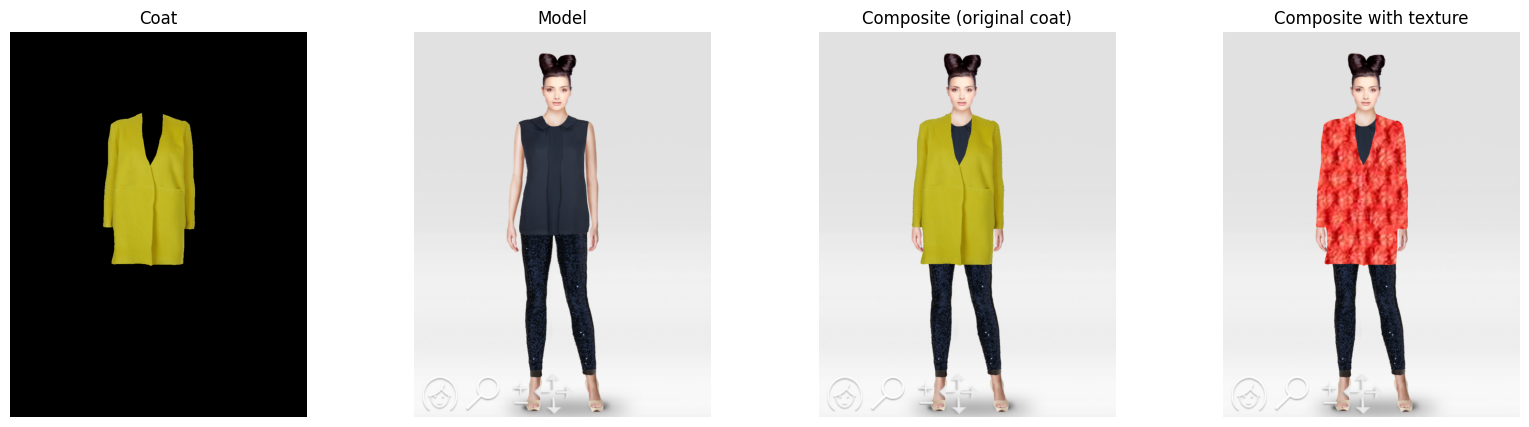

In [13]:
# 6. Visualize all four
fig, axes = plt.subplots(1, 4, figsize=(20,5))
axes[0].imshow(coat)
axes[0].set_title("Coat")
axes[0].axis("off")

axes[1].imshow(model)
axes[1].set_title("Model")
axes[1].axis("off")

axes[2].imshow(composite)
axes[2].set_title("Composite (original coat)")
axes[2].axis("off")

axes[3].imshow(composite_texture)
axes[3].set_title("Composite with texture")
axes[3].axis("off")

plt.show()

# 4. Contrast Enhancement

### **4.1 Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.

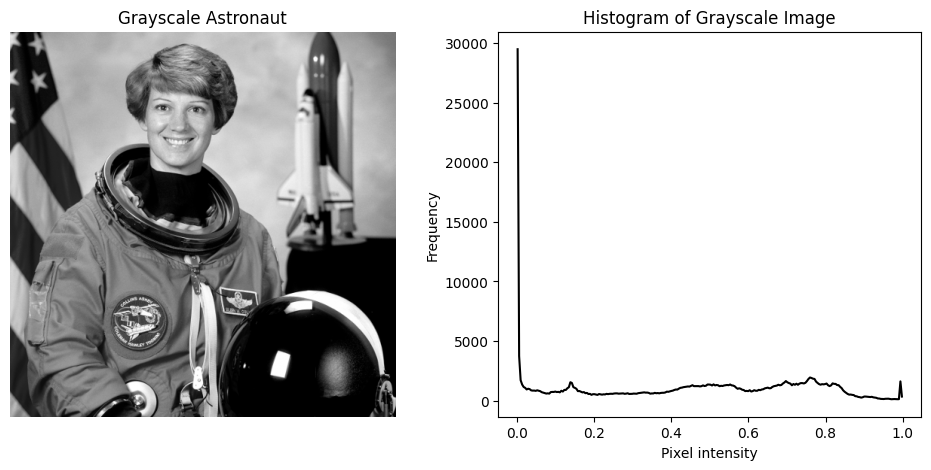

In [14]:
# solution

import matplotlib.pyplot as plt
from skimage import data, color, exposure

# 1. Load astronaut image
img_color = data.astronaut()  # RGB image

# 2. Convert to grayscale
img_gray = color.rgb2gray(img_color)  # float64, values 0-1

# 3. Compute histogram
hist, bin_centers = exposure.histogram(img_gray)

# 4. Plot grayscale image and histogram
fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Grayscale Astronaut")
axes[0].axis('off')

axes[1].plot(bin_centers, hist, color='black')
axes[1].set_title("Histogram of Grayscale Image")
axes[1].set_xlabel("Pixel intensity")
axes[1].set_ylabel("Frequency")

plt.show()

### 4.2 *   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

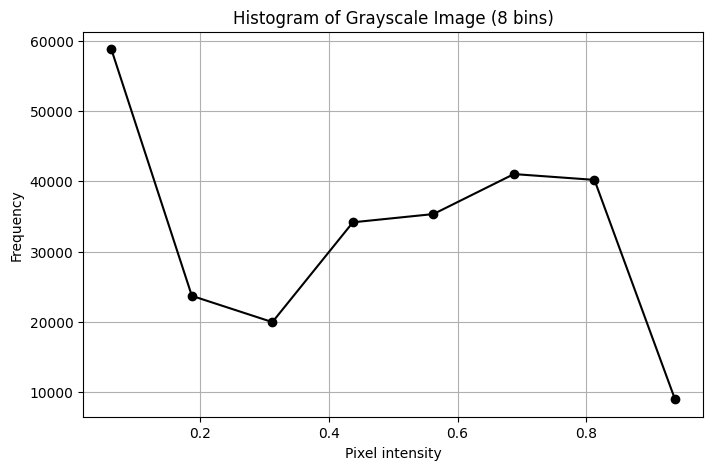

In [15]:
# solution

# 2. Compute histogram with 8 bins
hist, bin_centers = exposure.histogram(img_gray, nbins=8)

# 3. Plot
plt.figure(figsize=(8,5))
plt.plot(bin_centers, hist, marker='o', color='black')
plt.title("Histogram of Grayscale Image (8 bins)")
plt.xlabel("Pixel intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### 4.3 Questions

*  1. What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*  2. What happens when the bin count is very low and what happens when it is very high?



**Solution**

*(Double-click or enter to edit)*

1. Changing the bin count affects the granularity of your histogram:

      - Low bin count: Fewer, wider bins. You get a general overview but lose detail.
      - High bin count: More, narrower bins. You get more detail but may see noise.

*** How Bin Count Affects Your Inference

When you change the bin count in a histogram, it changes what you can infer about the image:

*** With Few Bins (Low Bin Count):
- **You see the big picture** but miss details
- **Inference**: "This image is generally dark" or "Most pixels are in mid-tones"
- **Risk**: You might miss important subtle variations in intensity

*** With Many Bins (High Bin Count):
- **You see fine details** but might see noise
- **Inference**: "There are specific intensity values that are more common" 
- **Risk**: You might overinterpret random variations as meaningful patterns

#### Understanding "Inference" in Histogram Analysis

Let me explain what "inference" means in the context of histogram analysis and contrast enhancement.

#### What is Inference?

In simple terms, **inference** means the conclusions or interpretations you draw from the data. In histogram analysis, it refers to:

1. **What you learn** about the image from its histogram
2. **What decisions you make** based on that information
3. **How you interpret** the distribution of pixel intensities

#### How Bin Count Affects Your Inference

When you change the bin count in a histogram, it changes what you can infer about the image:

#### With Few Bins (Low Bin Count):
- **You see the big picture** but miss details
- **Inference**: "This image is generally dark" or "Most pixels are in mid-tones"
- **Risk**: You might miss important subtle variations in intensity

#### With Many Bins (High Bin Count):
- **You see fine details** but might see noise
- **Inference**: "There are specific intensity values that are more common" 
- **Risk**: You might overinterpret random variations as meaningful patterns

The key takeaway is that your "inference" (what you conclude about the image) can change significantly based on how you choose to bin the histogram data. There's no one right answer - it depends on what you're trying to learn about the image!

### 4.4 Task:
*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


In [16]:
#solution
# 1. Load astronaut image
img_color = data.astronaut()  # RGB image

print(f"Image shape: {img_color.shape}")
print(f"Image dtype: {img_color.dtype}")


Image shape: (512, 512, 3)
Image dtype: uint8


In [17]:
# 2. Compute histograms for each channel
red_channel = img_color[:, :, 0].flatten()
green_channel = img_color[:, :, 1].flatten()
blue_channel = img_color[:, :, 2].flatten()

# 3. Compute total histogram (all channels combined)
total_histogram = img_color.flatten()

/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_23240/1478033196.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


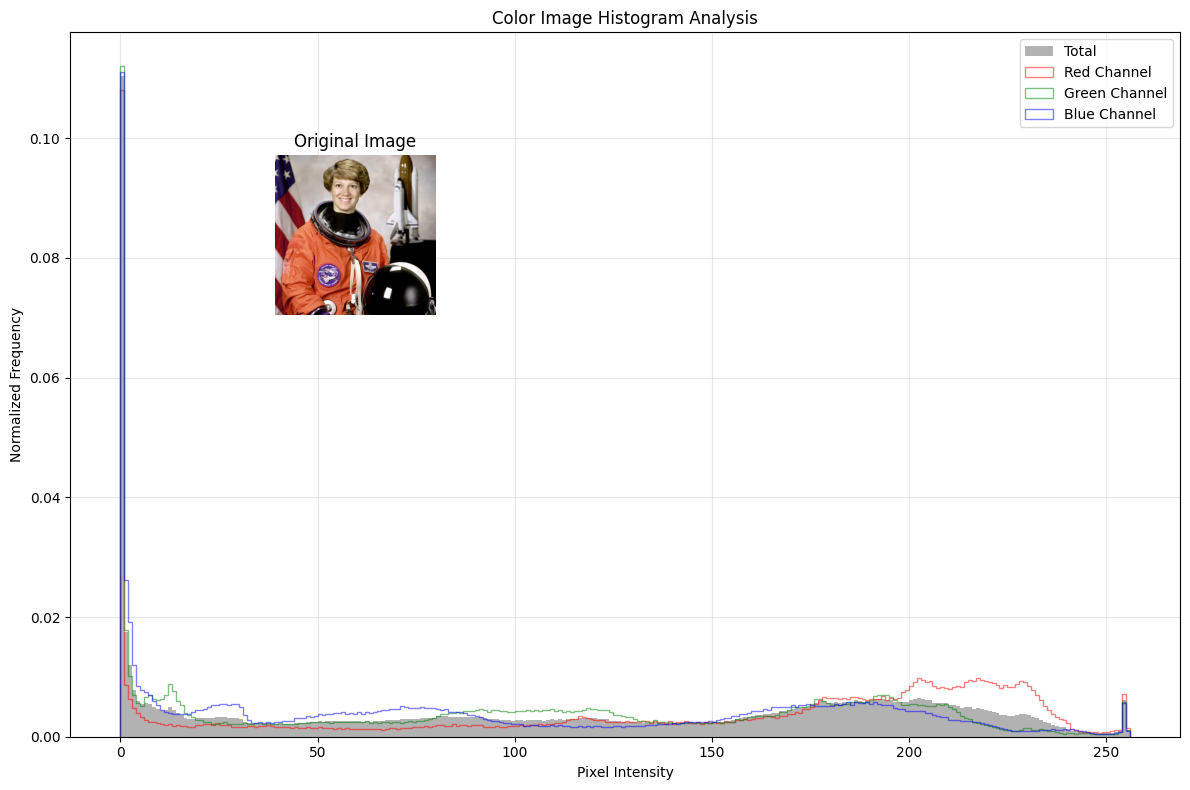

In [18]:
# Set up the plot
plt.figure(figsize=(12, 8))

# Plot total histogram
plt.hist(total_histogram, bins=256, range=[0, 256], 
         color='black', alpha=0.3, label='Total', density=True)

# Plot individual channel histograms
plt.hist(red_channel, bins=256, range=[0, 256], 
         color='red', alpha=0.5, label='Red Channel', density=True, histtype='step')
plt.hist(green_channel, bins=256, range=[0, 256], 
         color='green', alpha=0.5, label='Green Channel', density=True, histtype='step')
plt.hist(blue_channel, bins=256, range=[0, 256], 
         color='blue', alpha=0.5, label='Blue Channel', density=True, histtype='step')

# Customize the plot
plt.title('Color Image Histogram Analysis')
plt.xlabel('Pixel Intensity')
plt.ylabel('Normalized Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

# Add the image itself as an inset
ax_inset = plt.axes([0.2, 0.6, 0.2, 0.2])
ax_inset.imshow(img_color)
ax_inset.set_title('Original Image')
ax_inset.axis('off')

plt.tight_layout()
plt.show()

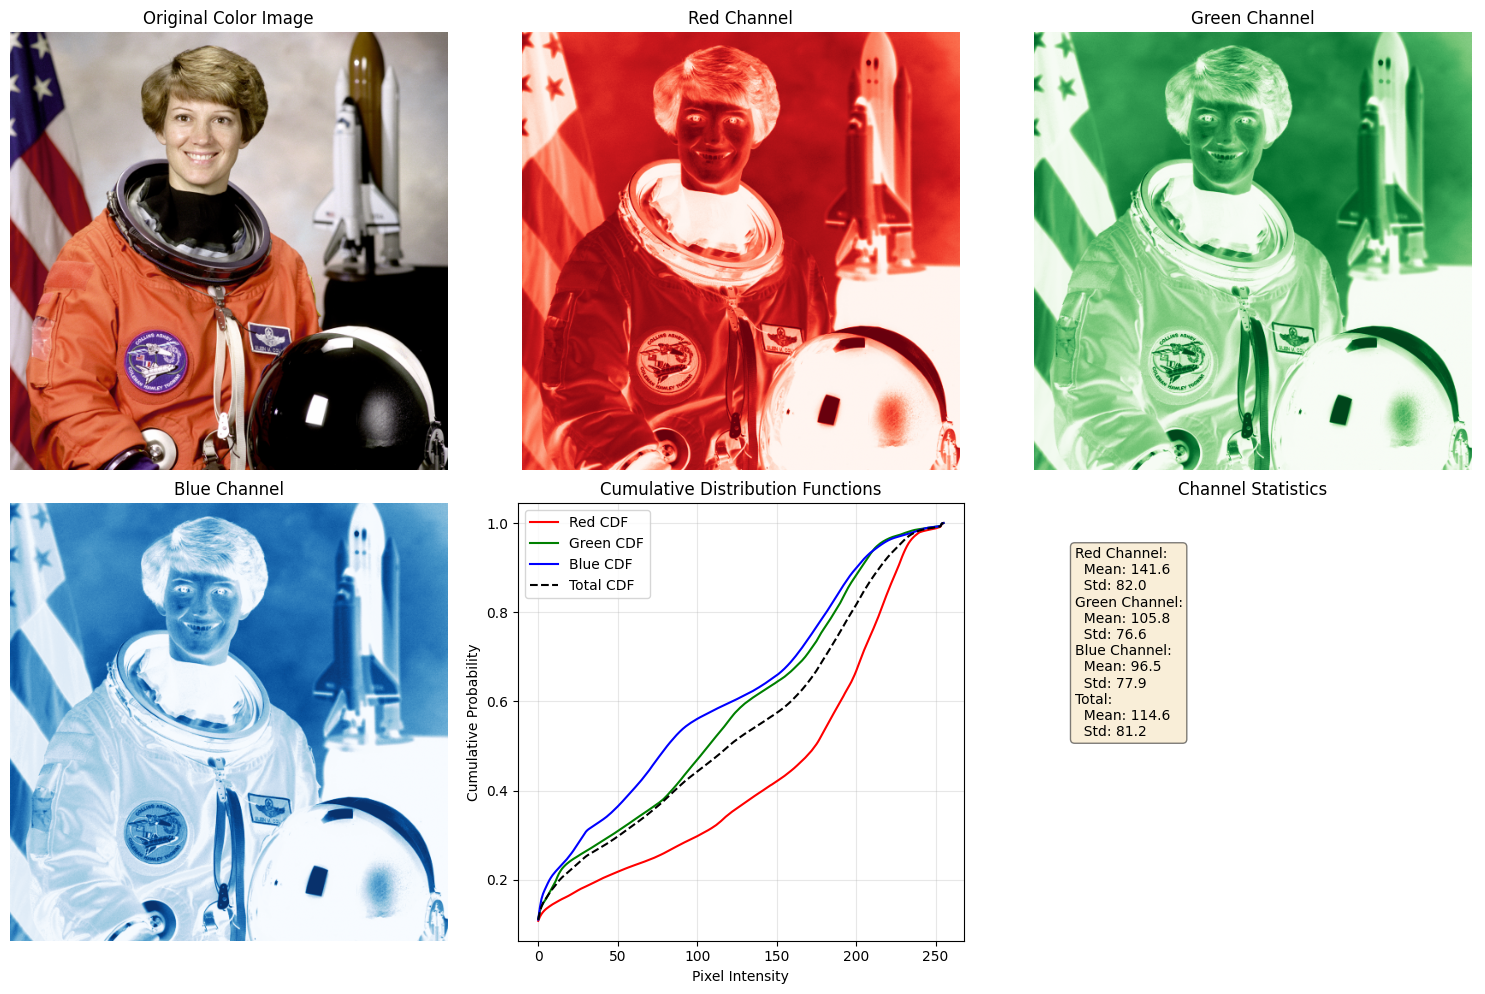

In [19]:
# Let's analyze the histograms more deeply
plt.figure(figsize=(15, 10))

# 1. Show the original image
plt.subplot(2, 3, 1)
plt.imshow(img_color)
plt.title('Original Color Image')
plt.axis('off')

# 2. Show individual channels
plt.subplot(2, 3, 2)
plt.imshow(img_color[:, :, 0], cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_color[:, :, 1], cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(img_color[:, :, 2], cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')

# 3. Show cumulative distribution functions
plt.subplot(2, 3, 5)
# Calculate CDFs
red_cdf = np.cumsum(np.histogram(red_channel, bins=256, range=[0, 256])[0]) / len(red_channel)
green_cdf = np.cumsum(np.histogram(green_channel, bins=256, range=[0, 256])[0]) / len(green_channel)
blue_cdf = np.cumsum(np.histogram(blue_channel, bins=256, range=[0, 256])[0]) / len(blue_channel)
total_cdf = np.cumsum(np.histogram(total_histogram, bins=256, range=[0, 256])[0]) / len(total_histogram)

plt.plot(red_cdf, color='red', label='Red CDF')
plt.plot(green_cdf, color='green', label='Green CDF')
plt.plot(blue_cdf, color='blue', label='Blue CDF')
plt.plot(total_cdf, color='black', label='Total CDF', linestyle='--')
plt.title('Cumulative Distribution Functions')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Show statistical information
plt.subplot(2, 3, 6)
# Calculate basic statistics
stats_text = (
    f"Red Channel:\n"
    f"  Mean: {np.mean(red_channel):.1f}\n"
    f"  Std: {np.std(red_channel):.1f}\n"
    f"Green Channel:\n"
    f"  Mean: {np.mean(green_channel):.1f}\n"
    f"  Std: {np.std(green_channel):.1f}\n"
    f"Blue Channel:\n"
    f"  Mean: {np.mean(blue_channel):.1f}\n"
    f"  Std: {np.std(blue_channel):.1f}\n"
    f"Total:\n"
    f"  Mean: {np.mean(total_histogram):.1f}\n"
    f"  Std: {np.std(total_histogram):.1f}"
)

plt.text(0.1, 0.9, stats_text, fontsize=10, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.title('Channel Statistics')
plt.axis('off')

plt.tight_layout()
plt.show()

### 4.5 **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



#### Step 1: Read the Image

Image shape: (2112, 2816, 3)
Image type: <class 'numpy.ndarray'>
Image data type: uint8
Intensity range: 0 to 255


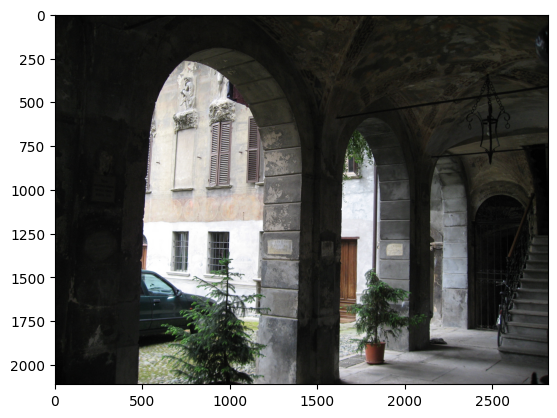

In [20]:
# solution

# Read the image
image = io.imread('images/aquatermi_lowcontrast.jpg')

# Let's see what we're working with
print(f"Image shape: {image.shape}")
print(f"Image type: {type(image)}")
print(f"Image data type: {image.dtype}")
print(f"Intensity range: {image.min()} to {image.max()}")

plt.imshow(image)

#### Step 2: Compute the Histogram of the Original Image

A histogram shows how many pixels have each possible intensity value. For an 8-bit image, intensities range from 0 (black) to 255 (white).

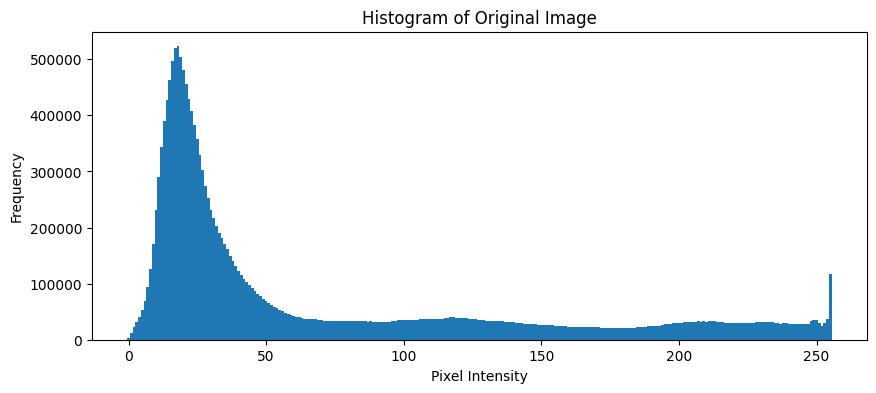

In [21]:
# Compute the histogram of the original image
hist_original, bin_edges = np.histogram(image.flatten(), bins=256, range=[0, 256])

# Let's see what the histogram looks like
plt.figure(figsize=(10, 4))
plt.bar(bin_edges[:-1], hist_original, width=1)
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

#### Step 3: Perform Histogram Equalization

Histogram equalization is a technique that spreads out the intensity values to cover the full range, which enhances contrast.

In [22]:
# Perform histogram equalization
equalized_image = exposure.equalize_hist(image)

# Convert back to 8-bit (0-255 range) for display
equalized_image = (equalized_image * 255).astype(np.uint8)

print(f"Equalized image range: {equalized_image.min()} to {equalized_image.max()}")

/opt/anaconda3/envs/tf_env/lib/python3.11/site-packages/skimage/_shared/utils.py:445: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


Equalized image range: 0 to 255


#### Step 4: Compute Histogram of the Equalized Image



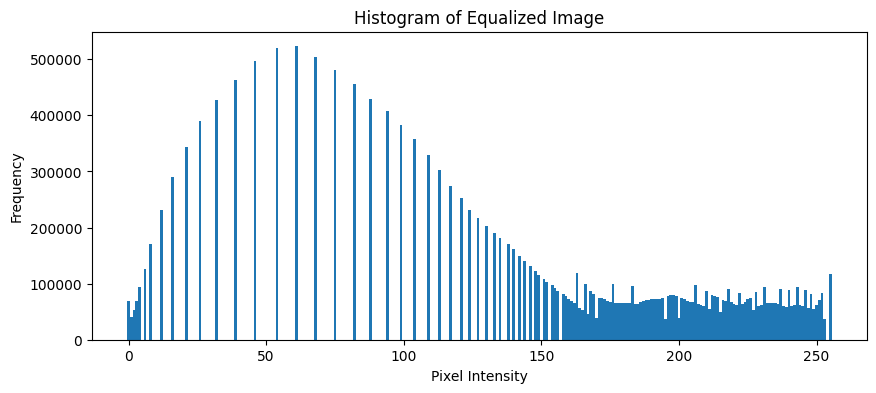

In [23]:
# Compute histogram of the equalized image
hist_equalized, bin_edges_eq = np.histogram(equalized_image.flatten(), bins=256, range=[0, 256])

# Let's see the new histogram
plt.figure(figsize=(10, 4))
plt.bar(bin_edges_eq[:-1], hist_equalized, width=1)
plt.title('Histogram of Equalized Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

#### Step 5: Create the 2×2 Subplot

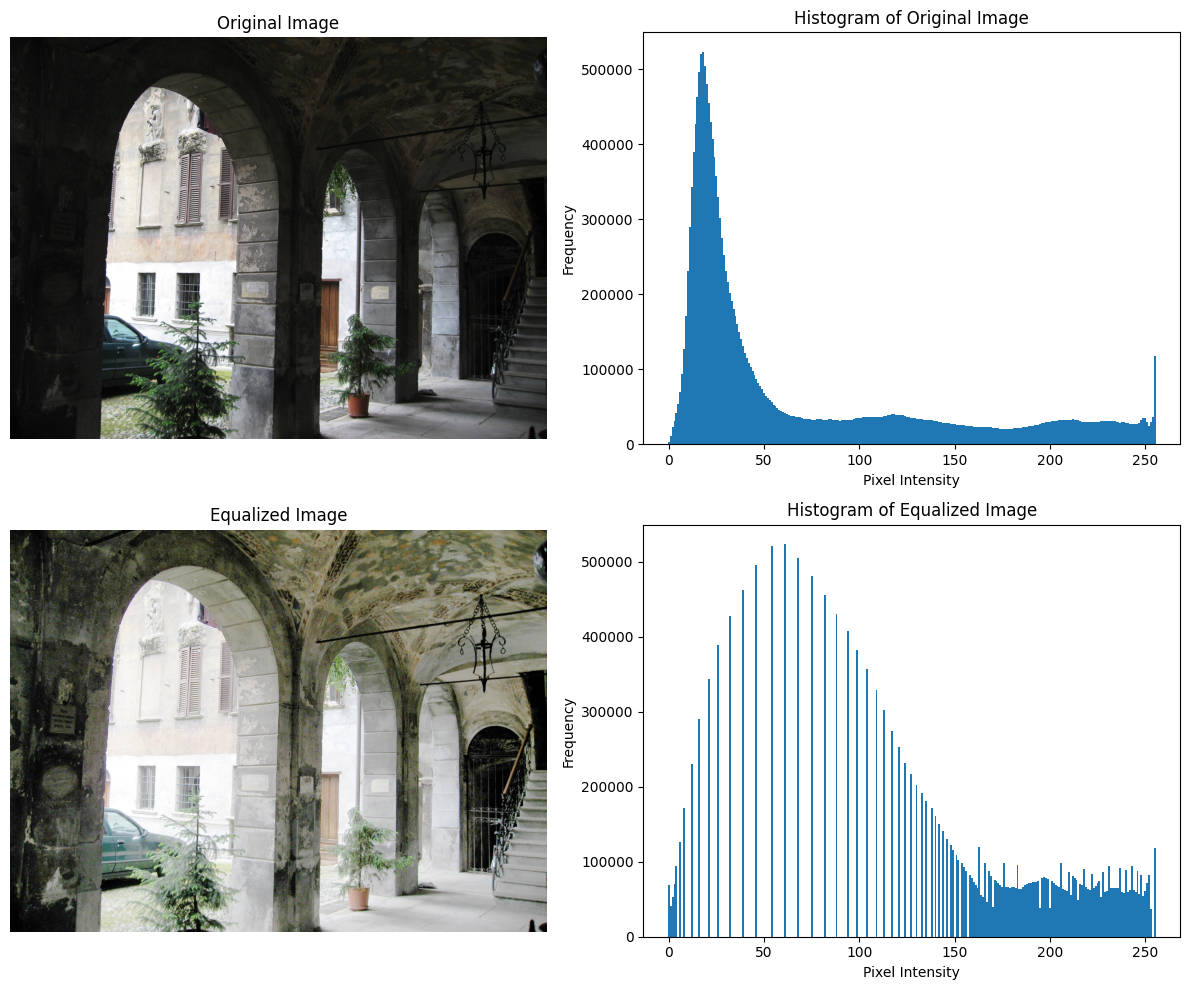

In [24]:
# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Histogram of original image
axes[0, 1].bar(bin_edges[:-1], hist_original, width=1)
axes[0, 1].set_title('Histogram of Original Image')
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')

# Equalized image
axes[1, 0].imshow(equalized_image, cmap='gray')
axes[1, 0].set_title('Equalized Image')
axes[1, 0].axis('off')

# Histogram of equalized image
axes[1, 1].bar(bin_edges_eq[:-1], hist_equalized, width=1)
axes[1, 1].set_title('Histogram of Equalized Image')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Step 6: Understanding What Happened

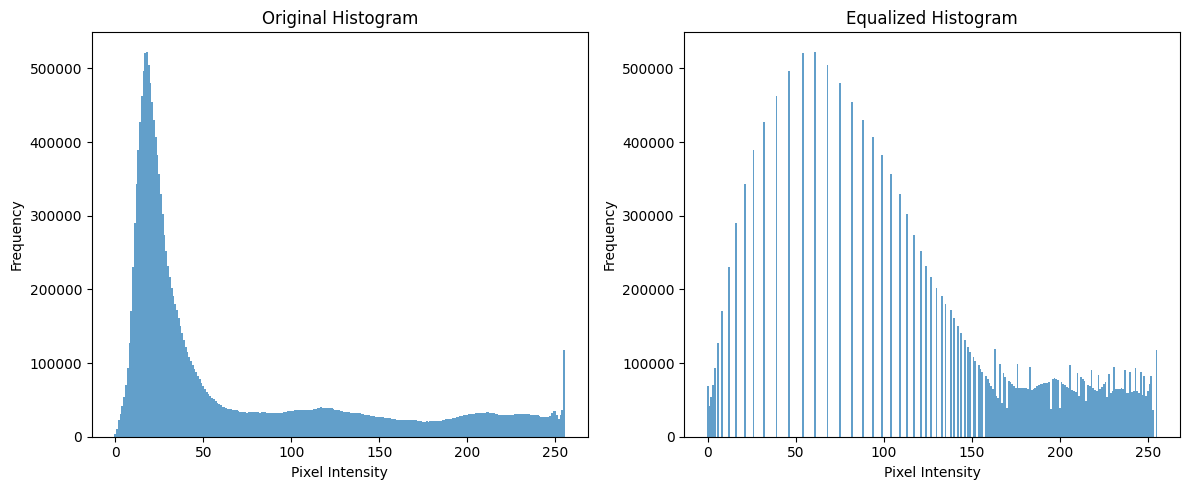

BEFORE equalization:
  Intensity range: 0 to 255
  Mean intensity: 68.7
  Standard deviation: 71.2

AFTER equalization:
  Intensity range: 0 to 255
  Mean intensity: 128.6
  Standard deviation: 72.6


In [25]:
# Let's compare the histograms side by side
plt.figure(figsize=(12, 5))

# Original histogram
plt.subplot(1, 2, 1)
plt.bar(bin_edges[:-1], hist_original, width=1, alpha=0.7)
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Equalized histogram
plt.subplot(1, 2, 2)
plt.bar(bin_edges_eq[:-1], hist_equalized, width=1, alpha=0.7)
plt.title('Equalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate and display some statistics
print("BEFORE equalization:")
print(f"  Intensity range: {image.min()} to {image.max()}")
print(f"  Mean intensity: {np.mean(image):.1f}")
print(f"  Standard deviation: {np.std(image):.1f}")

print("\nAFTER equalization:")
print(f"  Intensity range: {equalized_image.min()} to {equalized_image.max()}")
print(f"  Mean intensity: {np.mean(equalized_image):.1f}")
print(f"  Standard deviation: {np.std(equalized_image):.1f}")

**What Histogram Equalization Does:**

- Before equalization: The histogram is "bunched up" in a narrow range of intensities
- After equalization: The histogram is "spread out" to cover the full range of intensities
----


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

**Histogram Equalization vs. Linear Contrast Stretch**

- How Histogram Equalization Differs from Linear Contrast Stretch

    - Histogram equalization and linear contrast stretch are both contrast enhancement techniques, but they work in fundamentally different ways:
  
**Histogram Equalization (CDF-based)**
- **Uses cumulative distribution function (CDF)**: Maps pixel values based on the probability distribution of intensities
- **Non-linear transformation**: The mapping function is based on the actual distribution of pixel values
- **Goal**: Create a uniform distribution of intensities across the entire range
- **Method**: 
  1. Calculate the histogram of the image
  2. Compute the cumulative distribution function (CDF)
  3. Use the CDF to map original values to new values
- **Result**: Enhances contrast throughout the image, but particularly in regions with high pixel concentration

**Linear Contrast Stretch**
- **Uses simple linear scaling**: Applies a linear transformation to pixel values
- **Linear transformation**: Stretches the original range to fill the entire available range
- **Goal**: Maximize the dynamic range of the image
- **Method**:
  1. Find the minimum and maximum pixel values in the image
  2. Apply a linear transformation: `new_value = (old_value - min) * (255/(max-min))`
- **Result**: Enhances global contrast but doesn't specifically address regions with clustered values

**Key Differences**

| Aspect | Histogram Equalization | Linear Contrast Stretch |
|--------|------------------------|-------------------------|
| **Transformation** | Non-linear, based on CDF | Linear, based on min/max |
| **Contrast Enhancement** | Adaptive to pixel distribution | Uniform across range |
| **Result** | More natural-looking enhancement | Can cause loss of detail in extremes |
| **Complexity** | More computationally intensive | Simpler and faster |
| **Handles Clusters** | Specifically targets clustered values | Treats all values equally |


### **4.6 Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



In [26]:
# solution

def linear_contrast_stretch(image, bins=256):
    """
    Apply linear contrast stretch to an image.
    
    Parameters:
    image: Input image (grayscale)
    bins: Number of bins for histogram (not used in stretching, but for visualization)
    
    Returns:
    stretched_image: Contrast-stretched image
    """
    # Convert to float for calculations
    image_float = image.astype(np.float64)
    
    # Find minimum and maximum values
    min_val = np.min(image_float)
    max_val = np.max(image_float)
    
    # Avoid division by zero
    if max_val == min_val:
        return image
    
    # Apply linear contrast stretch
    stretched_image = (image_float - min_val) * (255.0 / (max_val - min_val))
    
    # Convert back to uint8
    stretched_image = stretched_image.astype(np.uint8)
    
    return stretched_image

# Read a grayscale image (replace with your image path)
# If you have a color image, convert it to grayscale first

image = io.imread('images/aquatermi_lowcontrast.jpg')
# 2. Convert to grayscale
img_gray = color.rgb2gray(image)  # float64, values 0-1


# image = io.imread('your_image.jpg', as_gray=True)
# For demonstration, let's create a low-contrast image
# image = np.random.randint(100, 150, size=(256, 256), dtype=np.uint8)

image = img_gray

# Apply linear contrast stretch
stretched_image = linear_contrast_stretch(image)


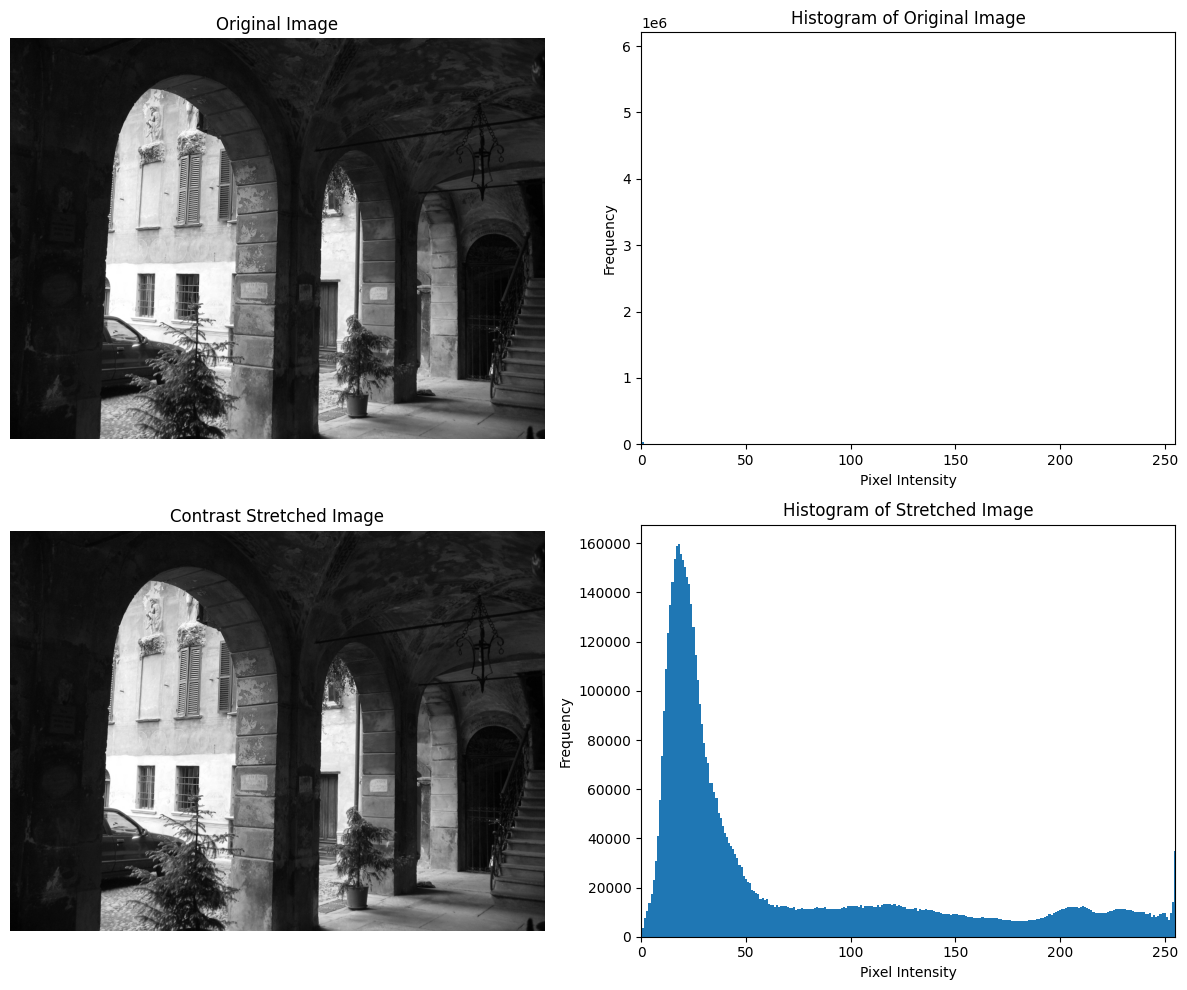

Original Image:
  Min: 0.0, Max: 1.0
  Mean: 0.27, Std: 0.28

Stretched Image:
  Min: 0, Max: 255
  Mean: 69.21, Std: 70.92


In [27]:
# Compute histograms
hist_original, bins_original = np.histogram(image.flatten(), bins=256, range=[0, 256])
hist_stretched, bins_stretched = np.histogram(stretched_image.flatten(), bins=256, range=[0, 256])

# Create 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Histogram of original image
axes[0, 1].bar(bins_original[:-1], hist_original, width=1)
axes[0, 1].set_title('Histogram of Original Image')
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_xlim([0, 255])

# Stretched image
axes[1, 0].imshow(stretched_image, cmap='gray')
axes[1, 0].set_title('Contrast Stretched Image')
axes[1, 0].axis('off')

# Histogram of stretched image
axes[1, 1].bar(bins_stretched[:-1], hist_stretched, width=1)
axes[1, 1].set_title('Histogram of Stretched Image')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_xlim([0, 255])

plt.tight_layout()
plt.show()

# Print some statistics
print("Original Image:")
print(f"  Min: {np.min(image)}, Max: {np.max(image)}")
print(f"  Mean: {np.mean(image):.2f}, Std: {np.std(image):.2f}")

print("\nStretched Image:")
print(f"  Min: {np.min(stretched_image)}, Max: {np.max(stretched_image)}")
print(f"  Mean: {np.mean(stretched_image):.2f}, Std: {np.std(stretched_image):.2f}")

In [28]:
sssimport numpy as np
import matplotlib.pyplot as plt

def linear_contrast_stretch(image):
    """Apply linear contrast stretch to an image."""
    image_float = image.astype(np.float64)
    min_val = np.min(image_float)
    max_val = np.max(image_float)
    
    if max_val == min_val:
        return image
    
    stretched_image = (image_float - min_val) * (255.0 / (max_val - min_val))
    return stretched_image.astype(np.uint8)

# Create low-contrast image

image = io.imread('images/aquatermi_lowcontrast.jpg')
# 2. Convert to grayscale
img_gray = color.rgb2gray(image)  # float64, values 0-1
image = img_gray

# image = np.random.randint(100, 150, size=(256, 256), dtype=np.uint8)
stretched_image = linear_contrast_stretch(image)

# Compute histograms with appropriate ranges
hist_original, bins_original = np.histogram(image.flatten(), bins=50, range=[90, 160])
hist_stretched, bins_stretched = np.histogram(stretched_image.flatten(), bins=50, range=[0, 255])

# Create 2x2 subplot with proper scaling
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original image
axes[0, 0].imshow(image, cmap='gray', vmin=0, vmax=255)
axes[0, 0].set_title('Original Image\n(Range: 100-150)')
axes[0, 0].axis('off')

# Histogram of original image (zoomed to actual data range)
axes[0, 1].bar(bins_original[:-1], hist_original, width=1.5)
axes[0, 1].set_title('Histogram of Original Image\n(Zoomed to 90-160)')
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')

# Stretched image
axes[1, 0].imshow(stretched_image, cmap='gray')
axes[1, 0].set_title('Contrast Stretched Image\n(Range: 0-255)')
axes[1, 0].axis('off')

# Histogram of stretched image
axes[1, 1].bar(bins_stretched[:-1], hist_stretched, width=5)
axes[1, 1].set_title('Histogram of Stretched Image')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Show the actual data ranges
print("ORIGINAL IMAGE:")
print(f"Intensity range: {np.min(image)} to {np.max(image)}")
print(f"Mean intensity: {np.mean(image):.1f}")

print("\nSTRETCHED IMAGE:")
print(f"Intensity range: {np.min(stretched_image)} to {np.max(stretched_image)}")
print(f"Mean intensity: {np.mean(stretched_image):.1f}")

SyntaxError: invalid syntax (2641758855.py, line 1)

# 5. Filters

## **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.

### Step 1: Load the Image and Import Required Modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.morphology import disk
import skimage.filters.rank as rank
import skimage

# Check skimage version
print(f"scikit-image version: {skimage.__version__}")

# Load the coins image
image = data.coins()

# Define structuring elements with different radii
radius_20 = disk(20)
radius_30 = disk(30)  # Increased by 10
radius_10 = disk(10)  # Reduced by 10

# Apply mean filters with version compatibility
try:
    # Try the new parameter name (footprint) first
    mean_20 = rank.mean(image, footprint=radius_20)
    mean_30 = rank.mean(image, footprint=radius_30)
    mean_10 = rank.mean(image, footprint=radius_10)
    print("Using 'footprint' parameter")
except TypeError:
    try:
        # Try the old parameter name (selem)
        mean_20 = rank.mean(image, selem=radius_20)
        mean_30 = rank.mean(image, selem=radius_30)
        mean_10 = rank.mean(image, selem=radius_10)
        print("Using 'selem' parameter")
    except TypeError as e:
        print(f"Error: {e}")
        print("Your version might use a different parameter name.")
        # Let's check what parameters the function actually accepts
        import inspect
        print("Function signature:", inspect.signature(rank.mean))

scikit-image version: 0.25.2
Using 'footprint' parameter


Image shape: (303, 384)
Image dtype: uint8
Intensity range: 1 to 252


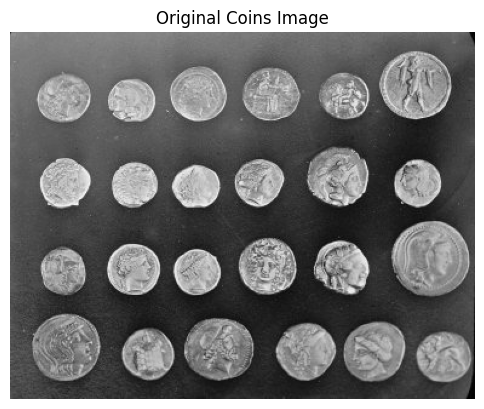

In [ ]:
# solution

from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import mean

# Load the coins image
image = data.coins()

print(f"Image shape: {image.shape}")
print(f"Image dtype: {image.dtype}")
print(f"Intensity range: {image.min()} to {image.max()}")

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Original Coins Image')
plt.axis('off')
plt.show()

### Step 2: Understand Structuring Elements

A structuring element defines the neighborhood for filtering. A disk structuring element includes pixels in a circular pattern.

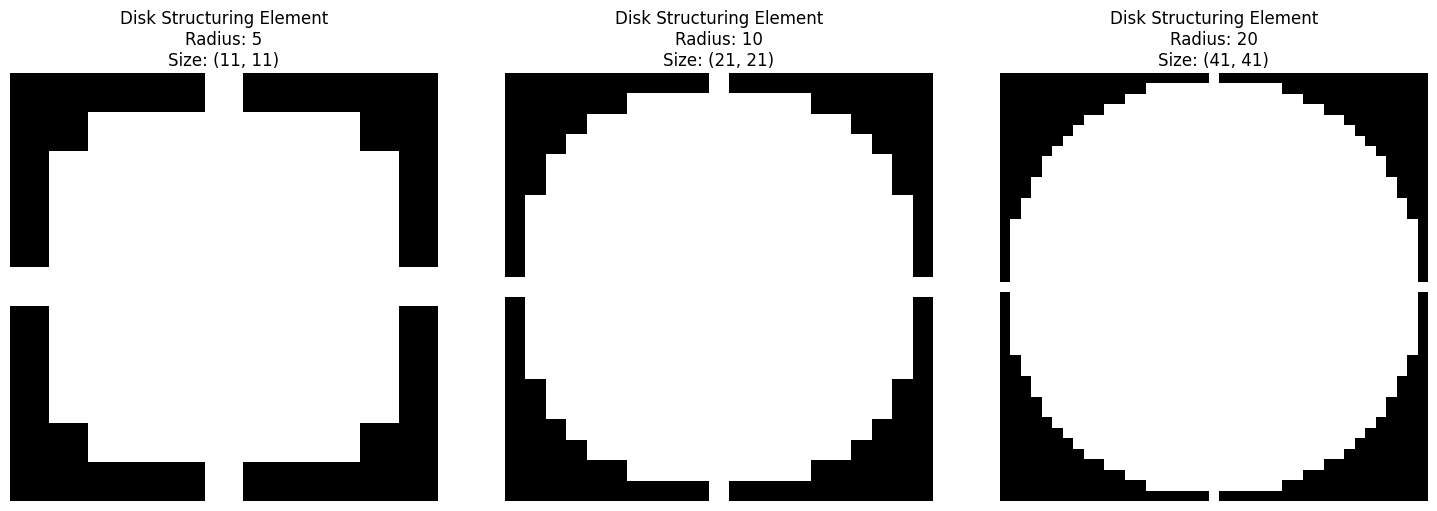


Disk with radius 20:
Shape: (41, 41)
The structuring element (white = include, black = exclude):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Let's visualize different disk structuring elements
radii = [5, 10, 20]

plt.figure(figsize=(15, 5))

for i, radius in enumerate(radii):
    selem = disk(radius)
    plt.subplot(1, 3, i+1)
    plt.imshow(selem, cmap='gray')
    plt.title(f'Disk Structuring Element\nRadius: {radius}\nSize: {selem.shape}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Show what the structuring element actually looks like
radius = 20
selem = disk(radius)
print(f"\nDisk with radius {radius}:")
print(f"Shape: {selem.shape}")
print("The structuring element (white = include, black = exclude):")
print(selem)

### Step 3: Apply Mean Filter with Different Radii

Structuring element sizes:
Radius 10: (21, 21)
Radius 20: (41, 41)
Radius 30: (61, 61)


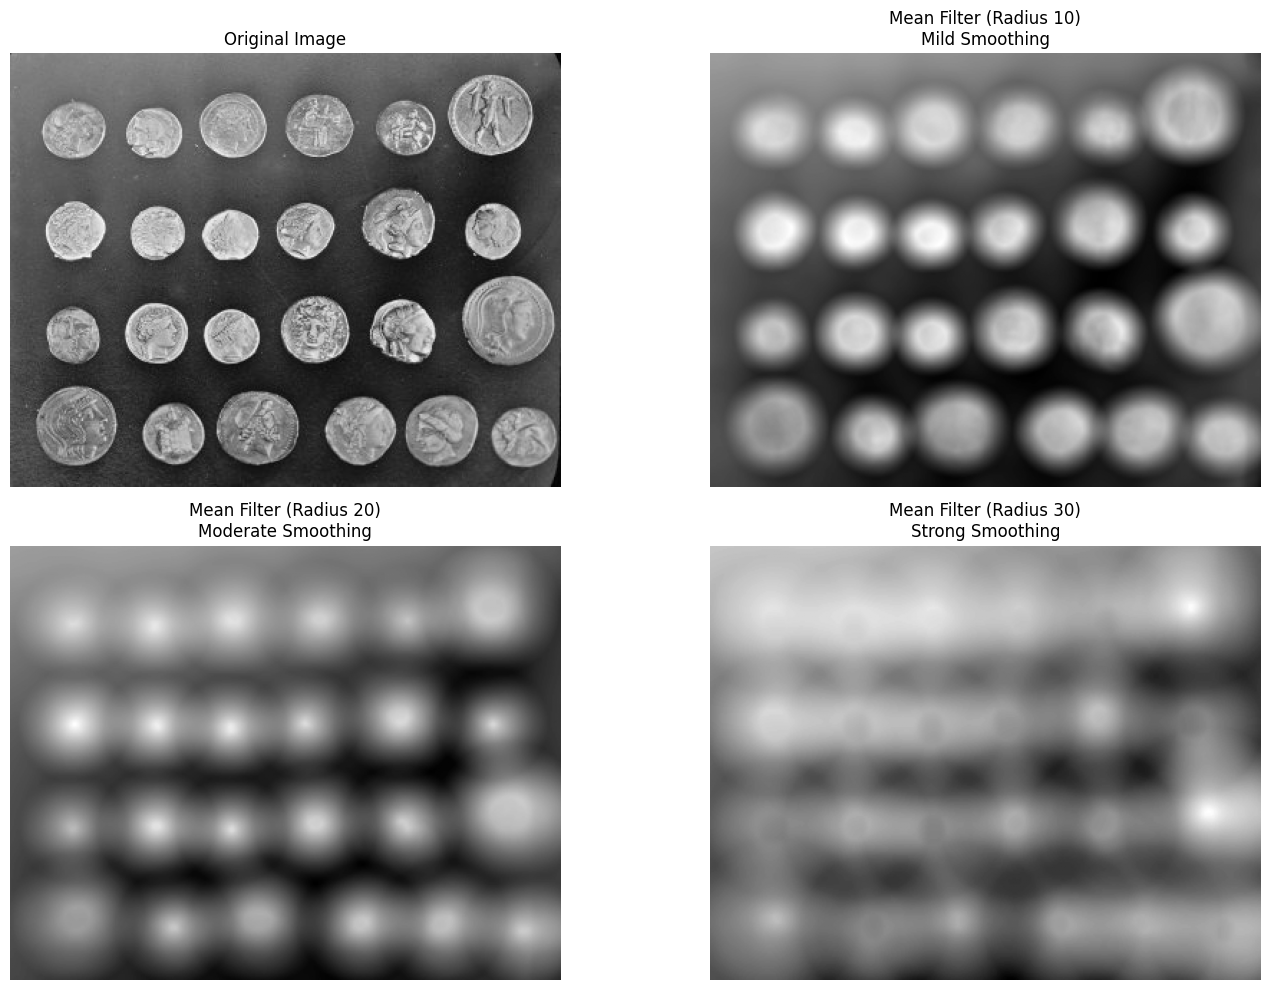

In [ ]:
# Create structuring elements with different radii
radius_20 = disk(20)  # Original radius
radius_30 = disk(30)  # Increased by 10
radius_10 = disk(10)  # Reduced by 10

print(f"Structuring element sizes:")
print(f"Radius 10: {radius_10.shape}")
print(f"Radius 20: {radius_20.shape}") 
print(f"Radius 30: {radius_30.shape}")

# Apply mean filters
mean_20 = mean(image, footprint=radius_20)
mean_30 = mean(image, footprint=radius_30)
mean_10 = mean(image, footprint=radius_10)

# Display all results
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Mean filter with radius 10
plt.subplot(2, 2, 2)
plt.imshow(mean_10, cmap='gray')
plt.title('Mean Filter (Radius 10)\nMild Smoothing')
plt.axis('off')

# Mean filter with radius 20  
plt.subplot(2, 2, 3)
plt.imshow(mean_20, cmap='gray')
plt.title('Mean Filter (Radius 20)\nModerate Smoothing')
plt.axis('off')

# Mean filter with radius 30
plt.subplot(2, 2, 4)
plt.imshow(mean_30, cmap='gray')
plt.title('Mean Filter (Radius 30)\nStrong Smoothing')
plt.axis('off')

plt.tight_layout()
plt.show()

### Step 4: Compare the Results More Clearly



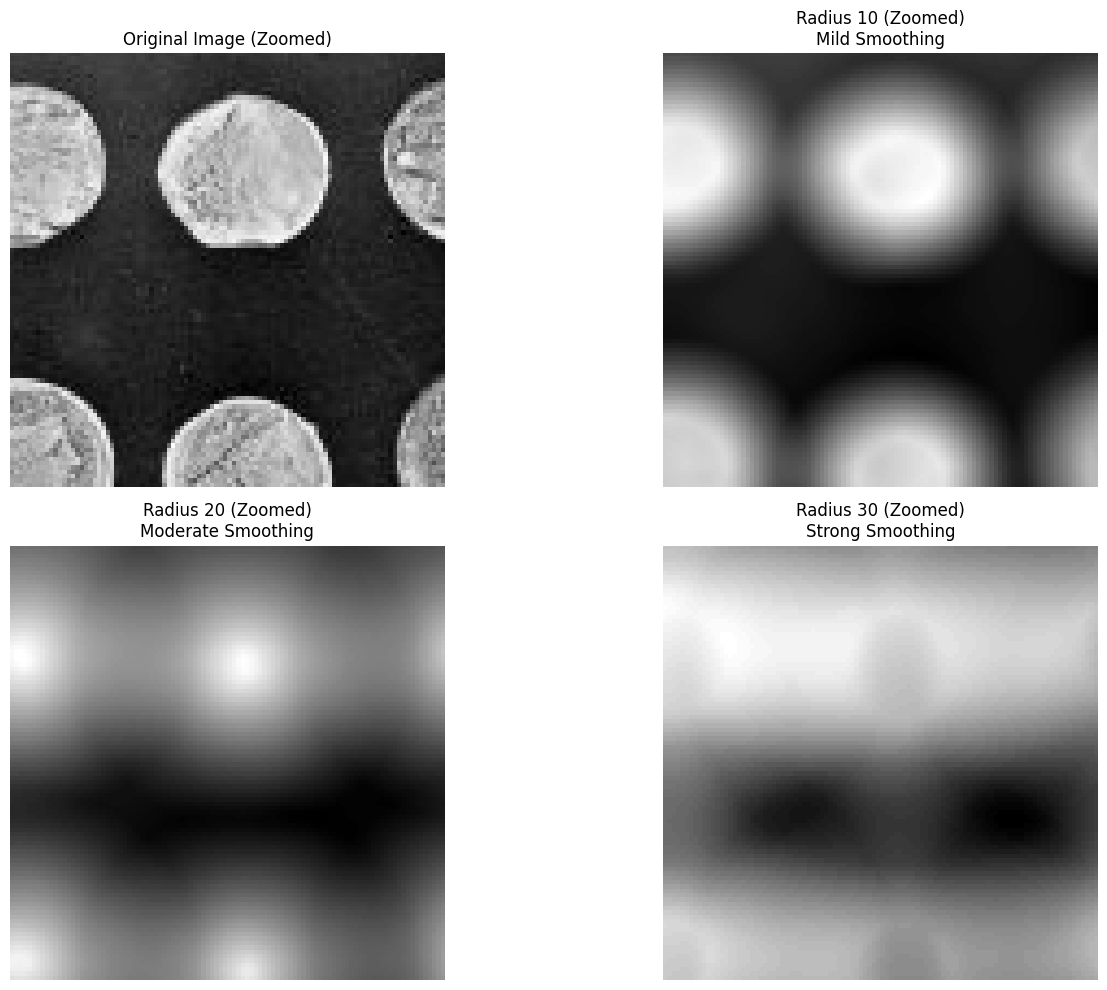

In [ ]:
# Zoom in on a specific area to see the smoothing effect better
zoom_area = (slice(100, 200), slice(100, 200))  # Define a zoom region

plt.figure(figsize=(15, 10))

# Original image (zoomed)
plt.subplot(2, 2, 1)
plt.imshow(image[zoom_area], cmap='gray')
plt.title('Original Image (Zoomed)')
plt.axis('off')

# Mean filter with radius 10 (zoomed)
plt.subplot(2, 2, 2)
plt.imshow(mean_10[zoom_area], cmap='gray')
plt.title('Radius 10 (Zoomed)\nMild Smoothing')
plt.axis('off')

# Mean filter with radius 20 (zoomed)
plt.subplot(2, 2, 3)
plt.imshow(mean_20[zoom_area], cmap='gray')
plt.title('Radius 20 (Zoomed)\nModerate Smoothing')
plt.axis('off')

# Mean filter with radius 30 (zoomed)
plt.subplot(2, 2, 4)
plt.imshow(mean_30[zoom_area], cmap='gray')
plt.title('Radius 30 (Zoomed)\nStrong Smoothing')
plt.axis('off')

plt.tight_layout()
plt.show()

### Step 5: Understand What's Happening



In [ ]:
# Let's look at a small example to understand the mean filter
small_image = np.array([[10, 20, 30, 40, 50],
                        [15, 25, 35, 45, 55],
                        [20, 30, 40, 50, 60],
                        [25, 35, 45, 55, 65],
                        [30, 40, 50, 60, 70]], dtype=np.uint8)

print("Small example image:")
print(small_image)

# Apply a small mean filter (3x3 square)
small_selem = np.ones((3, 3), dtype=bool)
print(f"\n3x3 structuring element:")
print(small_selem)

# Manual calculation for center pixel (40)
# Neighbors: 25,35,45,30,40,50,35,45,55
neighbors = [25, 35, 45, 30, 40, 50, 35, 45, 55]
manual_mean = np.mean(neighbors)
print(f"\nManual calculation for center pixel (40):")
print(f"Neighbors: {neighbors}")
print(f"Mean: {manual_mean:.1f}")

# Now let's see what the filter actually produces
from skimage.filters.rank import mean as rank_mean
filtered_small = rank_mean(small_image, small_selem)
print(f"\nFiltered result:")
print(filtered_small)
print(f"Center pixel changed from {small_image[2, 2]} to {filtered_small[2, 2]}")

Small example image:
[[10 20 30 40 50]
 [15 25 35 45 55]
 [20 30 40 50 60]
 [25 35 45 55 65]
 [30 40 50 60 70]]

3x3 structuring element:
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]

Manual calculation for center pixel (40):
Neighbors: [25, 35, 45, 30, 40, 50, 35, 45, 55]
Mean: 40.0

Filtered result:
[[17 22 32 42 47]
 [20 25 35 45 50]
 [25 30 40 50 55]
 [30 35 45 55 60]
 [32 37 47 57 62]]
Center pixel changed from 40 to 40


NameError: name 'gaussian_10' is not defined

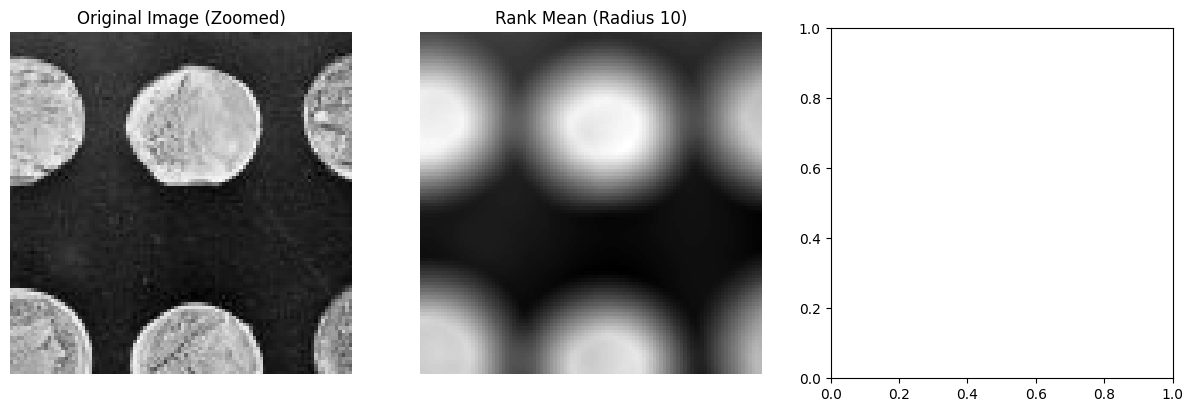

In [ ]:
# Compare different filtering approaches on a small region
zoom_area = (slice(100, 200), slice(100, 200))

plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(image[zoom_area], cmap='gray')
plt.title('Original Image (Zoomed)')
plt.axis('off')

# Try to show the rank mean if it worked
try:
    plt.subplot(2, 3, 2)
    plt.imshow(mean_10[zoom_area], cmap='gray')
    plt.title('Rank Mean (Radius 10)')
    plt.axis('off')
except:
    pass

# Gaussian filter
plt.subplot(2, 3, 3)
plt.imshow(gaussian_10[zoom_area], cmap='gray')
plt.title('Gaussian (σ=10)')
plt.axis('off')

# Manual mean filter
plt.subplot(2, 3, 4)
plt.imshow(manual_10[zoom_area], cmap='gray')
plt.title('Manual Mean (Size 11)')
plt.axis('off')

# Add explanations
plt.subplot(2, 3, 5)
plt.text(0.1, 0.8, 'Filter Comparisons:\n\n'
         '1. Rank Mean:\n   - Uses morphological operations\n   - Fast for small kernels\n\n'
         '2. Gaussian:\n   - Weighted averaging\n   - Better frequency response\n\n'
         '3. Manual Mean:\n   - Simple box filter\n   - Uniform weighting',
         fontsize=12, transform=plt.gca().transAxes)
plt.axis('off')

plt.tight_layout()
plt.show()

## Excersice 5.2

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

### Step 1: Import Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.morphology import square, rectangle, star, diamond
from skimage.morphology import footprint_rectangle

from skimage.filters.rank import mean

### Step 2: Load the Image

In [ ]:
# Load the coins image
image = data.coins()
print(f"Image shape: {image.shape}")
print(f"Image range: {image.min()} to {image.max()}")

Image shape: (303, 384)
Image range: 1 to 252


### Step 3: Define Different Structuring Elements

In [ ]:
# Define different structuring elements with optimal sizes
selem_square = footprint_rectangle((15, 15))        # 15x15 square
selem_rectangle = footprint_rectangle((15, 5))      # 15x5 rectangle (width, height)
selem_star = star(5)             # Star with radius 5
selem_diamond = diamond(5)       # Diamond with radius 5

### Step 4: Apply Mean Filter with Each Structuring Element

In [ ]:
# Apply mean filter with each structuring element
mean_square = mean(image, footprint=selem_square)
mean_rectangle = mean(image, footprint=selem_rectangle)
mean_star = mean(image, footprint=selem_star)
mean_diamond = mean(image, footprint=selem_diamond)


### Step 5: Create 2×4 Subplot Visualization



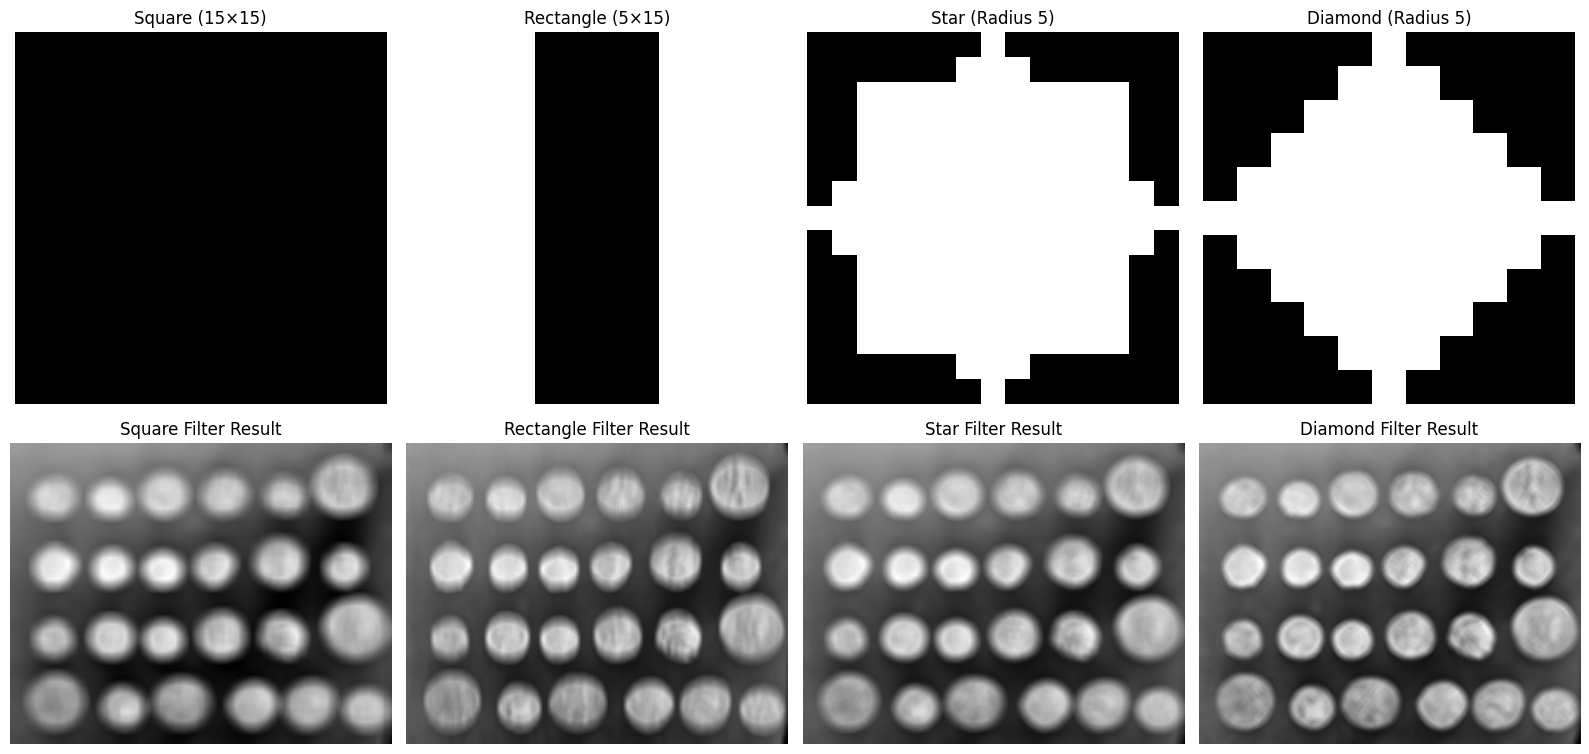

In [ ]:
# Create a 2 x 4 subplot to show selem and corresponding smoothed image
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# First row: Structuring elements
axes[0, 0].imshow(selem_square, cmap='gray')
axes[0, 0].set_title('Square (15×15)')
axes[0, 0].axis('off')

axes[0, 1].imshow(selem_rectangle, cmap='gray')
axes[0, 1].set_title('Rectangle (5×15)')
axes[0, 1].axis('off')

axes[0, 2].imshow(selem_star, cmap='gray')
axes[0, 2].set_title('Star (Radius 5)')
axes[0, 2].axis('off')

axes[0, 3].imshow(selem_diamond, cmap='gray')
axes[0, 3].set_title('Diamond (Radius 5)')
axes[0, 3].axis('off')

# Second row: Corresponding smoothed images
axes[1, 0].imshow(mean_square, cmap='gray')
axes[1, 0].set_title('Square Filter Result')
axes[1, 0].axis('off')

axes[1, 1].imshow(mean_rectangle, cmap='gray')
axes[1, 1].set_title('Rectangle Filter Result')
axes[1, 1].axis('off')

axes[1, 2].imshow(mean_star, cmap='gray')
axes[1, 2].set_title('Star Filter Result')
axes[1, 2].axis('off')

axes[1, 3].imshow(mean_diamond, cmap='gray')
axes[1, 3].set_title('Diamond Filter Result')
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()

### Step 6: Zoomed Comparison for Better Visualization

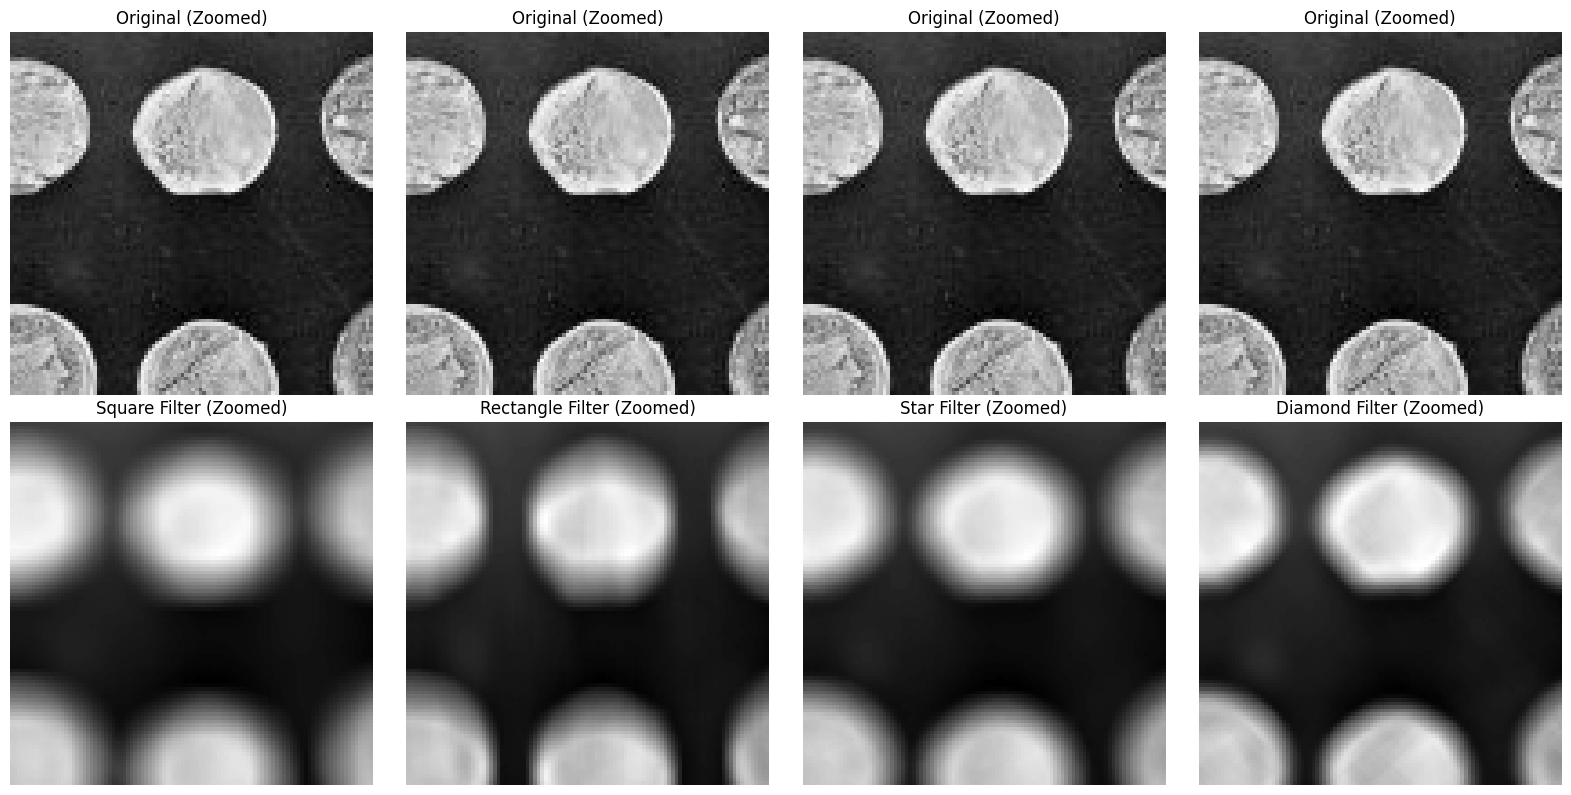

In [ ]:
# Zoom in on a specific area to see differences clearly
zoom_area = (slice(100, 200), slice(100, 200))

# Create zoomed comparison
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# First row: Original image zoomed
for i in range(4):
    axes[0, i].imshow(image[zoom_area], cmap='gray')
    axes[0, i].set_title('Original (Zoomed)')
    axes[0, i].axis('off')

# Second row: Filtered images zoomed
axes[1, 0].imshow(mean_square[zoom_area], cmap='gray')
axes[1, 0].set_title('Square Filter (Zoomed)')
axes[1, 0].axis('off')

axes[1, 1].imshow(mean_rectangle[zoom_area], cmap='gray')
axes[1, 1].set_title('Rectangle Filter (Zoomed)')
axes[1, 1].axis('off')

axes[1, 2].imshow(mean_star[zoom_area], cmap='gray')
axes[1, 2].set_title('Star Filter (Zoomed)')
axes[1, 2].axis('off')

axes[1, 3].imshow(mean_diamond[zoom_area], cmap='gray')
axes[1, 3].set_title('Diamond Filter (Zoomed)')
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()

## Step 7: Quantitative Analysis

In [ ]:
# Analyze the filtering effects quantitatively
def analyze_filter(original, filtered, name):
    diff = filtered.astype(float) - original.astype(float)
    print(f"{name}:")
    print(f"  Range change: {original.min()}-{original.max()} → {filtered.min()}-{filtered.max()}")
    print(f"  Mean change: {np.mean(diff):.2f}")
    print(f"  Max change: {np.max(np.abs(diff))}")
    print()

print("QUANTITATIVE ANALYSIS:")
analyze_filter(image, mean_square, "Square Filter")
analyze_filter(image, mean_rectangle, "Rectangle Filter")
analyze_filter(image, mean_star, "Star Filter")
analyze_filter(image, mean_diamond, "Diamond Filter")

QUANTITATIVE ANALYSIS:
Square Filter:
  Range change: 1-252 → 24-199
  Mean change: -0.49
  Max change: 137.0

Rectangle Filter:
  Range change: 1-252 → 6-214
  Mean change: -0.51
  Max change: 136.0

Star Filter:
  Range change: 1-252 → 11-204
  Mean change: -0.49
  Max change: 134.0

Diamond Filter:
  Range change: 1-252 → 6-212
  Mean change: -0.49
  Max change: 124.0




## Step 8: Bonus - Custom Structuring Elements


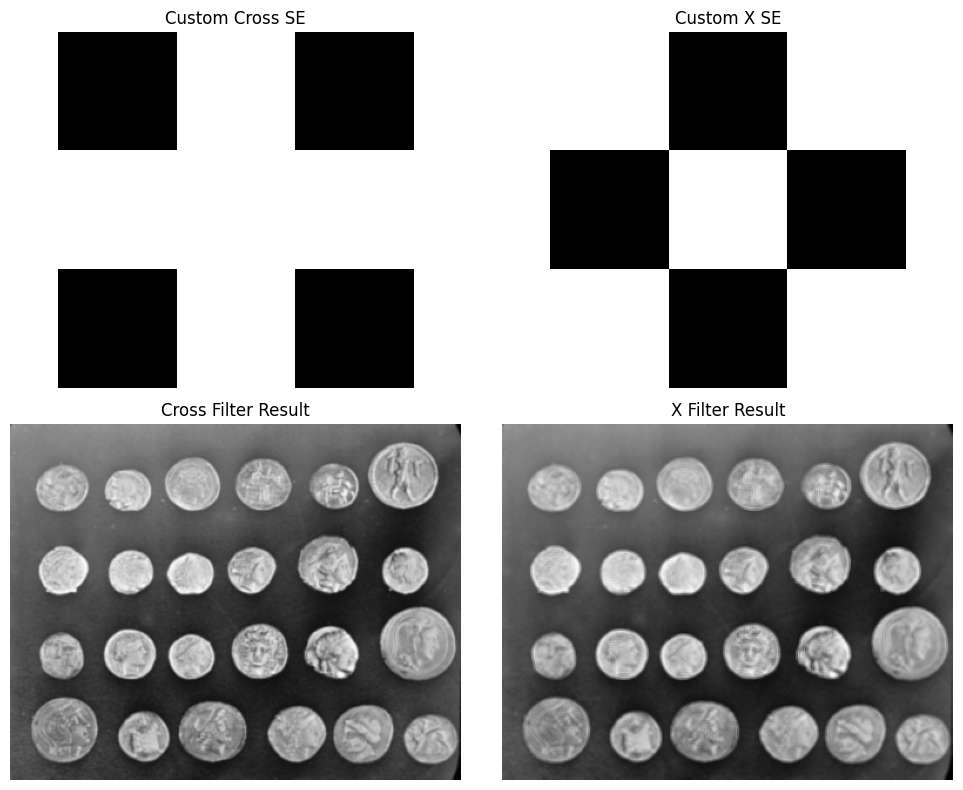

In [ ]:
# Create custom structuring elements
custom_cross = np.array([[0, 1, 0],
                         [1, 1, 1],
                         [0, 1, 0]], dtype=bool)

custom_x = np.array([[1, 0, 1],
                     [0, 1, 0],
                     [1, 0, 1]], dtype=bool)

# Apply custom filters
mean_cross = mean(image, footprint=custom_cross)
mean_x = mean(image, footprint=custom_x)

# Visualize custom filters
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].imshow(custom_cross, cmap='gray')
axes[0, 0].set_title('Custom Cross SE')
axes[0, 0].axis('off')

axes[0, 1].imshow(custom_x, cmap='gray')
axes[0, 1].set_title('Custom X SE')
axes[0, 1].axis('off')

axes[1, 0].imshow(mean_cross, cmap='gray')
axes[1, 0].set_title('Cross Filter Result')
axes[1, 0].axis('off')

axes[1, 1].imshow(mean_x, cmap='gray')
axes[1, 1].set_title('X Filter Result')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_22170/3182042385.py:13: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  selem_square = square(15)
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_22170/3182042385.py:14: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  selem_rectangle = rectangle(5, 15)


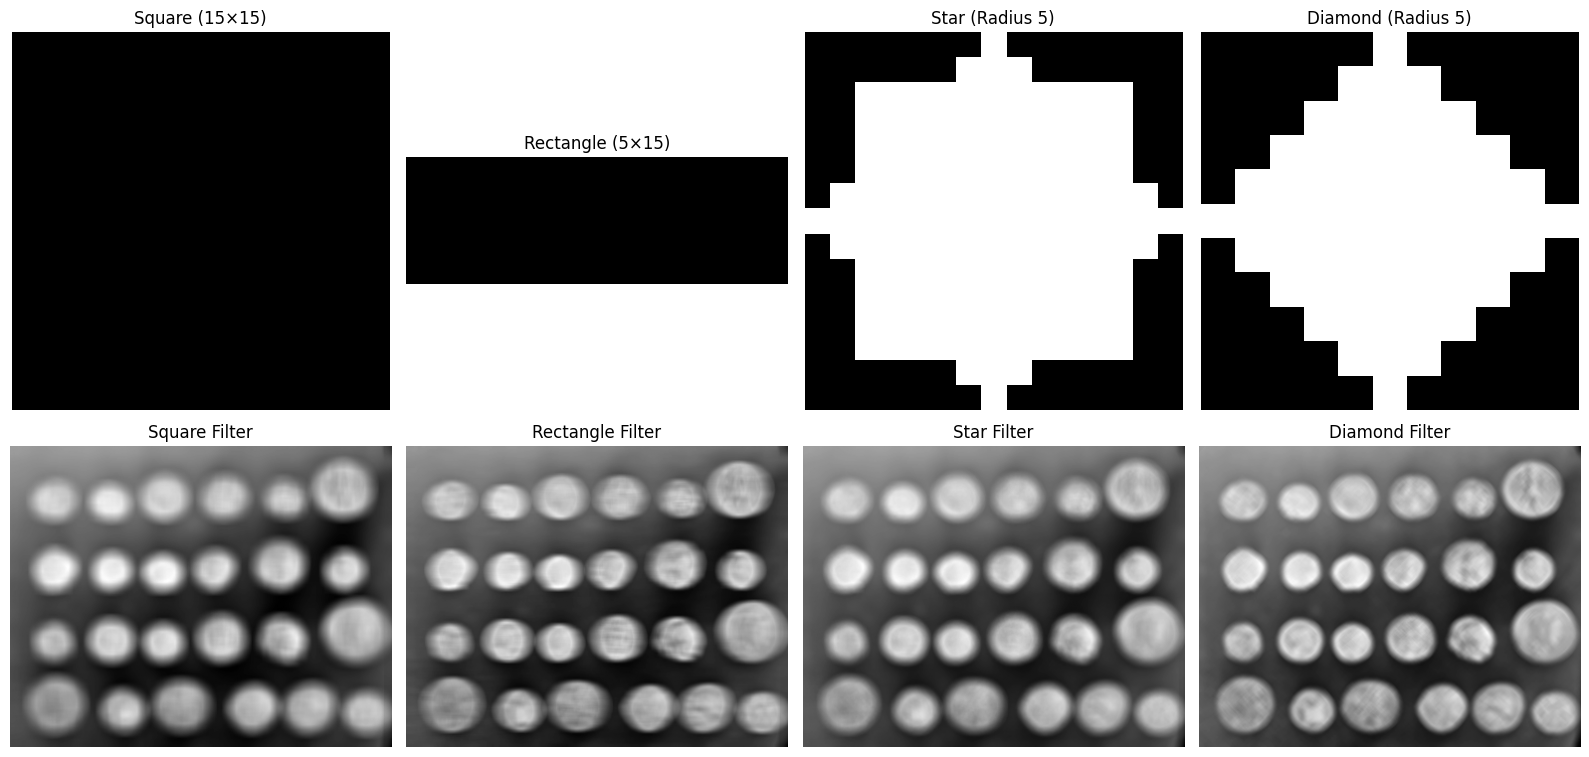

Exercise completed! Different structuring elements create different smoothing patterns.


In [ ]:
## Complete Code (All Steps Together)

import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.morphology import square, rectangle, star, diamond
from skimage.filters.rank import mean

# Step 1: Load image
image = data.coins()

# Step 2: Define structuring elements
selem_square = square(15)
selem_rectangle = rectangle(5, 15)
selem_star = star(5)
selem_diamond = diamond(5)

# Step 3: Apply mean filters
mean_square = mean(image, footprint=selem_square)
mean_rectangle = mean(image, footprint=selem_rectangle)
mean_star = mean(image, footprint=selem_star)
mean_diamond = mean(image, footprint=selem_diamond)

# Step 4: Create main visualization
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Structuring elements row
titles = ['Square (15×15)', 'Rectangle (5×15)', 'Star (Radius 5)', 'Diamond (Radius 5)']
selems = [selem_square, selem_rectangle, selem_star, selem_diamond]

for i, (ax, selem, title) in enumerate(zip(axes[0], selems, titles)):
    ax.imshow(selem, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

# Filtered images row
filtered_images = [mean_square, mean_rectangle, mean_star, mean_diamond]
filtered_titles = ['Square Filter', 'Rectangle Filter', 'Star Filter', 'Diamond Filter']

for i, (ax, img, title) in enumerate(zip(axes[1], filtered_images, filtered_titles)):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

print("Exercise completed! Different structuring elements create different smoothing patterns.")

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

1. How does changing the radius of disk affect the smoothing functionality?
   
**Larger radius = more smoothing/blurring**
- Small radius: Mild smoothing, preserves details but reduces noise
- Medium radius: Moderate smoothing, some detail loss
- Large radius: Strong smoothing, significant blurring, details lost

Think of it like: **Bigger brush = more paint = more blur**


*   What is the observed behaviour with difference in the structuring element?

**Solution**

1. What is the observed behaviour with difference in the structuring element?

**Shape matters for smoothing pattern:**
- **Square**: Uniform smoothing in all directions
- **Rectangle**: Different smoothing in horizontal vs vertical directions  
- **Star/Diamond**: Unique patterns that preserve certain features
- **Disk**: Circular smoothing (most natural)

**Different shapes create different "blur patterns"**


*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

3. What is the difference between mean filter and gaussian filter?

**Mean Filter:**
- Simple average of neighbors
- All pixels weighted equally
- "Flat" blur effect
- Faster to compute

**Gaussian Filter:**
- Weighted average (center pixels matter more)
- Smooth, natural-looking blur
- Better frequency response
- More computationally expensive

**Think: Mean = flat blur, Gaussian = smooth natural blur**


## 4. Where to use mean vs gaussian filters?

**Use Mean Filter when:**
- You need fast processing
- Simple noise reduction
- Don't care about perfect smoothness
- Computational resources are limited

**Use Gaussian Filter when:**
- You want natural-looking results
- Preserving edges is important
- Advanced image processing
- Preparing images for other operations

**Simple rule: Mean for speed, Gaussian for quality**